<a href="https://colab.research.google.com/github/shylitboi/Personal-Project/blob/main/BBC_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BBC Îâ¥Ïä§ Í∏∞ÏÇ¨ ÌïµÏã¨ Ï†ïÎ≥¥ ÏöîÏïΩ ÌîÑÎ°úÏ†ùÌä∏
---
```
[Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è ÌÉêÏÉâ]
     ‚Üì
[Ï†ÑÏ≤òÎ¶¨: Î¨∏Ïû• Î∂ÑÌï†, Ï†ïÏ†ú, Î≤°ÌÑ∞Ìôî]
     ‚Üì
[ÏöîÏïΩ Î™®Îç∏ Í∞úÎ∞ú]
    ‚îú‚îÄ TF-IDF Í∏∞Î∞ò ÏöîÏïΩ
    ‚îú‚îÄ TextRank Í∏∞Î∞ò ÏöîÏïΩ
    ‚îî‚îÄ ÌïòÏù¥Î∏åÎ¶¨Îìú ÏöîÏïΩ
     ‚Üì
[ÏÑ±Îä• ÌèâÍ∞Ä]
    ‚îú‚îÄ Ï†ïÎüâÏ†Å: ROUGE, BERTScore, Meteor Score
    ‚îî‚îÄ Ï†ïÏÑ±Ï†Å: Ïò§Î•ò ÏÇ¨Î°Ä Î∂ÑÏÑù
     ‚Üì
[Í≤∞Í≥º Î∂ÑÏÑù Î∞è Í≤∞Î°† ÎèÑÏ∂ú]
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install wordcloud
import os
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download("punkt")
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt_tab')

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 167.6/167.6 kB 6.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /Users/sonyunboi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sonyunboi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
---

In [ ]:
df = pd.read_csv("/Users/sonyunboi/Desktop/Cau/25-1/·Ñê·Ö¶·Ü®·ÑÉ·Öµ·Ü∏/·ÑÄ·Ö¢·Ñã·Öµ·Ü´·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/dF.csv")
df.head()

filename category                                       article_path  \
0  078.txt    sport  /content/drive/MyDrive/Colab Notebooks/CAU/·Ñê·Ö¶·Ü®...   
1  148.txt    sport  /content/drive/MyDrive/Colab Notebooks/CAU/·Ñê·Ö¶·Ü®...   
2  370.txt    sport  /content/drive/MyDrive/Colab Notebooks/CAU/·Ñê·Ö¶·Ü®...   
3  381.txt    sport  /content/drive/MyDrive/Colab Notebooks/CAU/·Ñê·Ö¶·Ü®...   
4  475.txt    sport  /content/drive/MyDrive/Colab Notebooks/CAU/·Ñê·Ö¶·Ü®...   

                                        summary_path  \
0  /content/drive/MyDrive/Colab Notebooks/CAU/·Ñê·Ö¶·Ü®...   
1  /content/drive/MyDrive/Colab Notebooks/CAU/·Ñê·Ö¶·Ü®...   
2  /content/drive/MyDrive/Colab Notebooks/CAU/·Ñê·Ö¶·Ü®...   
3  /content/drive/MyDrive/Colab Notebooks/CAU/·Ñê·Ö¶·Ü®...   
4  /content/drive/MyDrive/Colab Notebooks/CAU/·Ñê·Ö¶·Ü®...   

                                        article_text  \
0  Butler strikes gold in Spain\n\nBritain's Kath...   
1  Palace threat over Cantona masks\n\nManchester...   
2  Robinson wants dual code success\n\nEngland ru...   
3  England claim Dubai Sevens glory\n\nEngland be...   
4  Agassi fear for Melbourne\n\nAndre Agassi's in...   

                                        summary_text  article_sent_count  \
0  Gelete Burka then crowned a great day for Ethi...                   8   
1  Manchester United fans wearing Eric Cantona ma...                   7   
2  Robinson, a former rugby league international ...                  17   
3  England beat Fiji 26-21 in a dramatic final in...                  10   
4  "I was not counting on this being the end of t...                  12   

   summary_sent_count  article_word_count  summary_word_count  
0                   1                 191                  92  
1                   3                 177                  58  
2                   4                 373                 144  
3                   1                 261                  80  
4                   3                 274                  90

# EDA
---

## 1. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Îâ¥Ïä§ Í∏∞ÏÇ¨ Í∞úÏàò ÏãúÍ∞ÅÌôî
- Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨(`politics`, `business`, `tech`, ...)Ïóê Ìè¨Ìï®Îêú Í∏∞ÏÇ¨ ÏàòÎ•º ÌååÏïÖÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∑†Ìòï Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïúÎã§.
- ÌäπÏ†ï Ïπ¥ÌÖåÍ≥†Î¶¨ Ï§ëÏã¨Ïùò Ïã§Ìóò ÏßÑÌñâ Ïó¨Î∂ÄÎ•º ÌåêÎã®ÌïòÎäî Îç∞ ÎèÑÏõÄÏùÑ Ï§ÄÎã§.

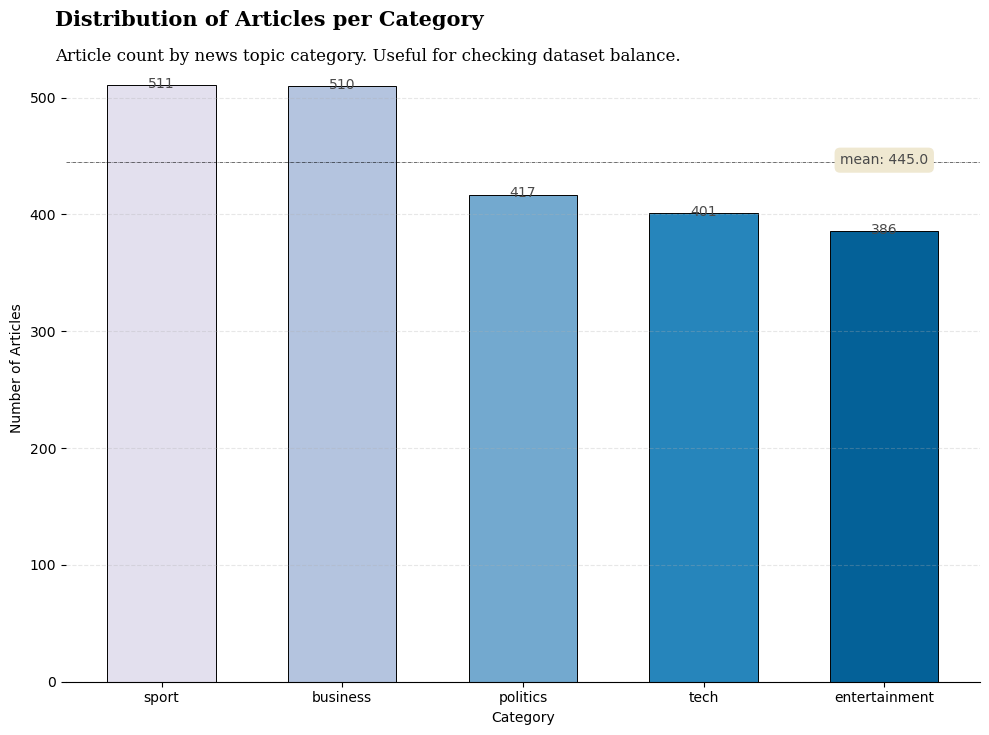

In [ ]:
# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∏∞ÏÇ¨ Ïàò
category_counts = df["category"].value_counts()
mean_count = category_counts.mean()

# ÏÉâÏÉÅ ÌåîÎ†àÌä∏ ÏßÄÏ†ï
palette = sns.color_palette("PuBu", len(category_counts))
colors = [palette[i] for i in range(len(category_counts))]

# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.bar(category_counts.index, category_counts.values,
       color=colors, width=0.6,
       edgecolor='black', linewidth=0.7)

# ÌèâÍ∑†ÏÑ†
ax.axhline(mean_count, color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean: {mean_count:.1f}",
            xy=(category_counts.index[-1], mean_count + 1.5),
            ha='center', va='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

# Í∞í Ï£ºÏÑù
for i, val in enumerate(category_counts.values):
    ax.annotate(f"{val}",
                xy=(category_counts.index[i], val + 1),
                ha='center', va='center',
                fontweight='light', color='#4a4a4a')

# Ïä§ÌÉÄÏùº Ï°∞Ï†ï
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

ax.set_ylabel("Number of Articles")
ax.set_xlabel("Category")
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Ï†úÎ™© Î∞è Î∂ÄÏ†úÎ™©
fig.text(0.06, 1.02, "Distribution of Articles per Category", fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.97, "Article count by news topic category. Useful for checking dataset balance.", fontsize=12, fontweight='light', fontfamily='serif')

plt.tight_layout()
plt.show()



## 2. Îâ¥Ïä§ ÏõêÎ¨∏ Î∞è ÏöîÏïΩÎ¨∏Ïùò Î¨∏Ïû• Ïàò Î∂ÑÌè¨ ÌôïÏù∏
- Í∏∞ÏÇ¨ÏôÄ ÏöîÏïΩ Î¨∏Ïû• ÏàòÏùò Î∂ÑÌè¨Î•º ÎπÑÍµêÌïòÏó¨, ÏöîÏïΩÎ¨∏Ïùò Í∏∏Ïù¥Î•º ÏÑ§Ï†ïÌï† Í∏∞Ï§ÄÏùÑ ÎßàÎ†®ÌïúÎã§.
- Ïòà: ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏöîÏïΩÏù¥ 3~5Î¨∏Ïû•Ïù¥ÎùºÎ©¥, Î™®Îç∏ Ï∂úÎ†•ÎèÑ top-5 Î¨∏Ïû•ÏúºÎ°ú Ï†úÌïú Í∞ÄÎä•


In [ ]:
# ÌèâÍ∑† Î¨∏Ïû• Ïàò Í≥ÑÏÇ∞
article_mean = df["article_sent_count"].mean()
summary_mean = df["summary_sent_count"].mean()

print(f"Îâ¥Ïä§ Î≥∏Î¨∏ ÌèâÍ∑† Î¨∏Ïû• Ïàò: {df['article_sent_count'].mean():.2f}")
print(f"ÏöîÏïΩ ÌèâÍ∑† Î¨∏Ïû• Ïàò: {df['summary_sent_count'].mean():.2f}")

Îâ¥Ïä§ Î≥∏Î¨∏ ÌèâÍ∑† Î¨∏Ïû• Ïàò: 18.62
ÏöîÏïΩ ÌèâÍ∑† Î¨∏Ïû• Ïàò: 2.08


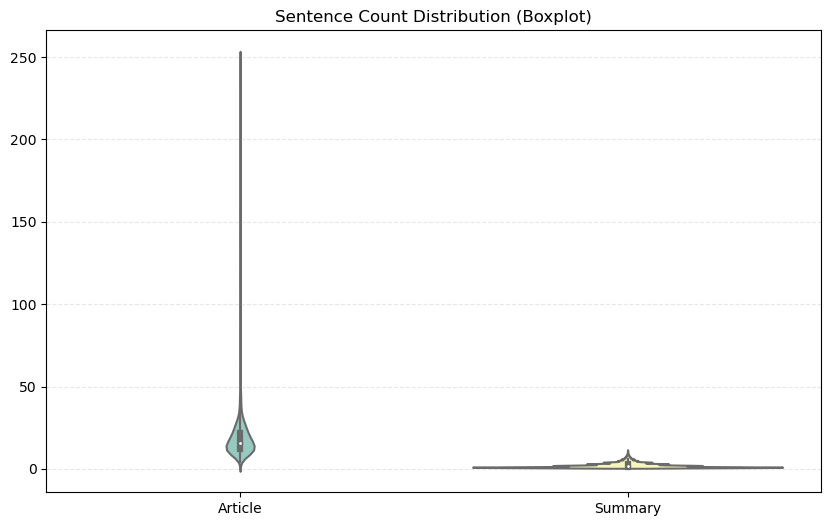

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[["article_sent_count", "summary_sent_count"]], palette="Set3")
plt.xticks([0, 1], ["Article", "Summary"])
plt.title("Sentence Count Distribution (Boxplot)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

## 3. Îã®Ïñ¥ Ïàò Í∏∞Î∞ò Í∏∏Ïù¥ Î∂ÑÌè¨ Ï∂îÍ∞Ä Î∂ÑÏÑù
- Î¨∏Ïû• Ïàò Ïô∏ÏóêÎèÑ Ïã§Ï†ú Îã®Ïñ¥ Ïàò Í∏∞Ï§ÄÏúºÎ°úÎèÑ Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïòÏó¨, Î™®Îç∏ ÏûÖÎ†•/Ï∂úÎ†• ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Ï†úÌïúÏùÑ ÏÑ§Ï†ïÌïòÎäî Îç∞ ÌôúÏö©ÌïúÎã§.


In [ ]:
article_word_avg = df["article_word_count"].mean()
summary_word_avg = df["summary_word_count"].mean()

print(f"Îâ¥Ïä§ Î≥∏Î¨∏ ÌèâÍ∑† Îã®Ïñ¥ Ïàò: {article_word_avg:.2f}")
print(f"ÏöîÏïΩÎ¨∏ ÌèâÍ∑† Îã®Ïñ¥ Ïàò: {summary_word_avg:.2f}")

Îâ¥Ïä§ Î≥∏Î¨∏ ÌèâÍ∑† Îã®Ïñ¥ Ïàò: 438.30
ÏöîÏïΩÎ¨∏ ÌèâÍ∑† Îã®Ïñ¥ Ïàò: 184.01


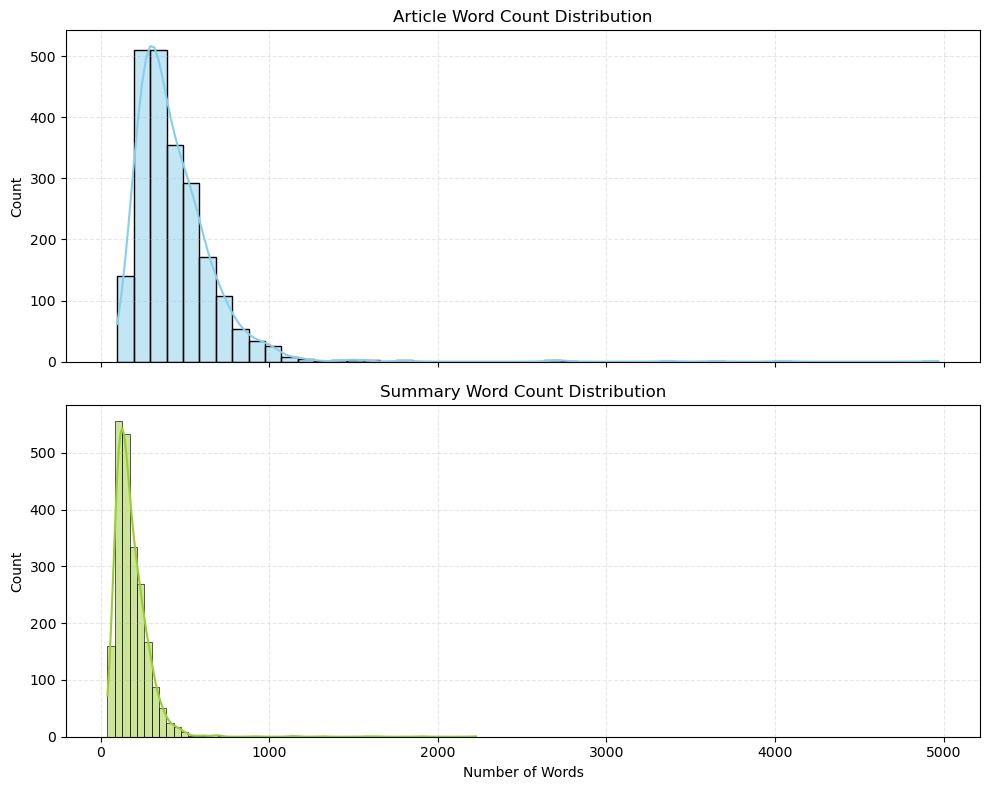

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Îâ¥Ïä§ Î≥∏Î¨∏ Îã®Ïñ¥ Ïàò Î∂ÑÌè¨
sns.histplot(df["article_word_count"], kde=True, color="skyblue", bins=50, ax=axs[0])
axs[0].set_title("Article Word Count Distribution")
axs[0].grid(True, linestyle='--', alpha=0.3)

# ÏöîÏïΩÎ¨∏ Îã®Ïñ¥ Ïàò Î∂ÑÌè¨
sns.histplot(df["summary_word_count"], kde=True, color="yellowgreen", bins=50, ax=axs[1])
axs[1].set_title("Summary Word Count Distribution")
axs[1].grid(True, linestyle='--', alpha=0.3)

plt.xlabel("Number of Words")
plt.tight_layout()
plt.show()

## 4. Î≥∏Î¨∏ Í∏∏Ïù¥Ïóê Îî∞Î•∏ ÏöîÏïΩ Í∏∏Ïù¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
- Í∏¥ Îâ¥Ïä§ÏùºÏàòÎ°ù ÏöîÏïΩÏù¥ Í∏∏Ïñ¥ÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
- ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÑ Í≤ΩÏö∞, Î™®Îç∏Ïùò Í∏∏Ïù¥ Ï†úÏñ¥Î•º Í∏∞ÏÇ¨ Í∏∏Ïù¥Ïóê Îî∞Îùº Ï°∞Ï†àÌï† Ïàò ÏûàÏùå


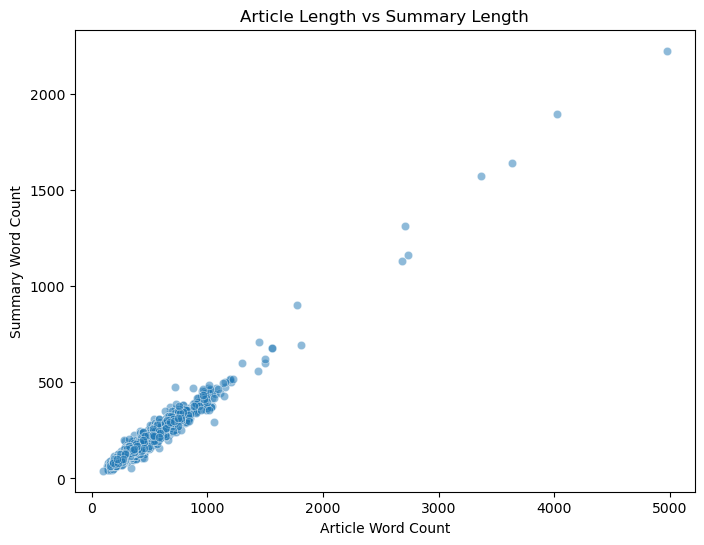


ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.98


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="article_word_count", y="summary_word_count", data=df, alpha=0.5)
plt.title("Article Length vs Summary Length")
plt.xlabel("Article Word Count")
plt.ylabel("Summary Word Count")
plt.show()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï∂úÎ†•
correlation = df["article_word_count"].corr(df["summary_word_count"])
print()
print(f"ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.2f}")

**Î≥∏Î¨∏Ïù¥ Í∏∏Î©¥ ÏöîÏïΩÎ¨∏ÎèÑ Í∏∏Îã§**

## 5. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏöîÏïΩ Í∏∏Ïù¥, Î¨∏Ïû• ÏàòÎ∂ÑÏÑù
- Îâ¥Ïä§ Ï¢ÖÎ•òÏóê Îî∞Îùº ÏöîÏïΩ Í∏∏Ïù¥Ïùò ÌäπÏßïÏù¥ Îã¨ÎùºÏßÄÎäîÏßÄ ÌôïÏù∏
- Ïπ¥ÌÖåÍ≥†Î¶¨Î≥ÑÎ°ú ÏÑúÎ°ú Îã§Î•∏ ÏöîÏïΩ Ï†ÑÎûµÏùÑ ÏÑ§Í≥ÑÌï† Ïàò ÏûàÎäî Í∑ºÍ±∞ Ï†úÍ≥µ


In [ ]:
summary_stats = df.groupby("category")["summary_word_count"].agg(["mean", "median", "std", "min", "max"]).round(2)
display(summary_stats)

mean  median     std  min   max
category                                        
business       156.47   142.0   66.56   44   469
entertainment  161.54   133.0  139.09   63  1897
politics       216.40   204.0  150.58   40  2225
sport          162.98   139.0   90.12   44   692
tech           233.78   207.0  124.69   69  1575

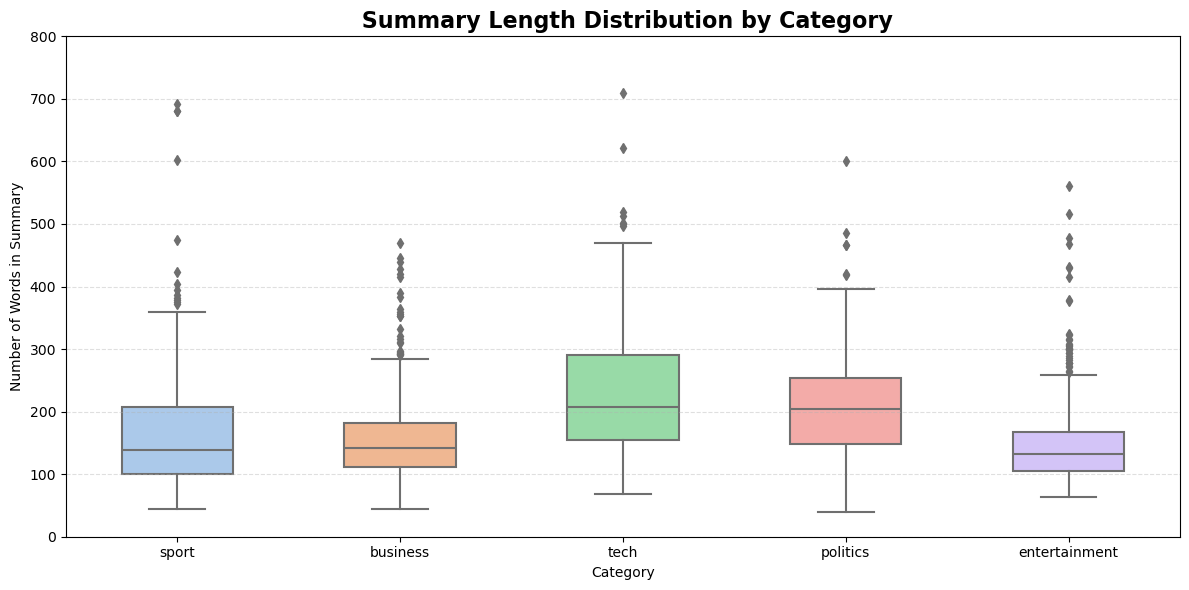

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x="category",
    y="summary_word_count",
    data=df,
    palette="pastel",
    width=0.5,
)

# ÌÉÄÏù¥ÌãÄ, Ï∂ï Î†àÏù¥Î∏î
plt.title(" Summary Length Distribution by Category", fontsize=16, fontweight='bold')
plt.ylabel("Number of Words in Summary")
plt.xlabel("Category")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.ylim(0, 800)  # ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Í∏∞ Ï¢ãÍ≤å ÏûòÎùºÏ§å
plt.tight_layout()
plt.show()

In [ ]:
# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏöîÏïΩ Î¨∏Ïû• Ïàò ÌèâÍ∑† Í≥ÑÏÇ∞
category_summary_stats = df.groupby("category")["summary_sent_count"].agg(["count", "mean", "std"]).reset_index()
category_summary_stats.columns = ["category", "num_articles", "avg_summary_sent", "std_dev"]

# Í≤∞Í≥º ÌôïÏù∏
print(category_summary_stats)

        category  num_articles  avg_summary_sent   std_dev
0       business           510          1.580392  0.944640
1  entertainment           386          1.751295  1.419827
2       politics           417          2.124700  1.309649
3          sport           511          2.696673  1.764566
4           tech           401          2.199501  1.593769


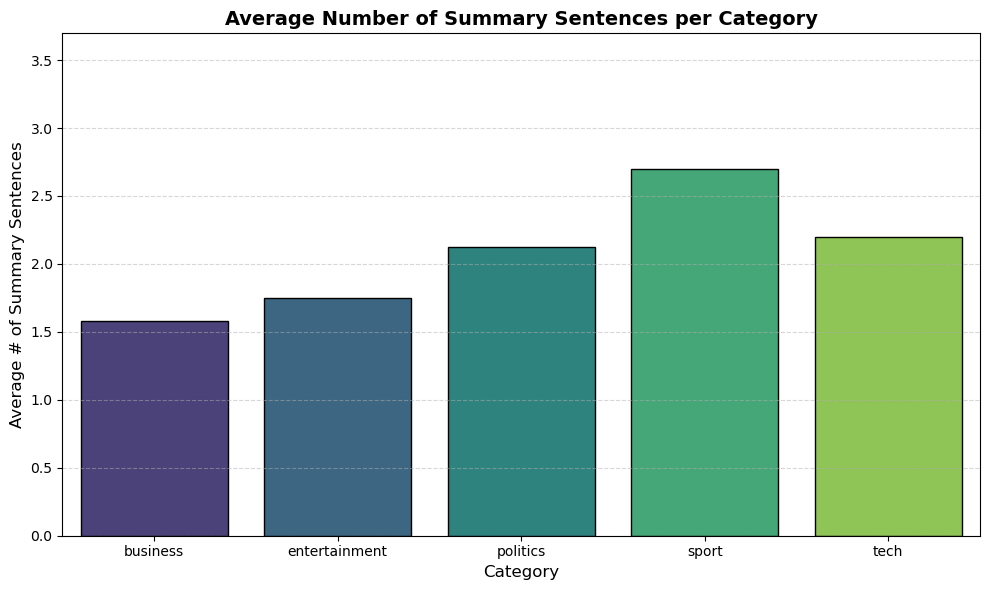

In [ ]:
# ÏãúÍ∞ÅÌôî (ÌèâÍ∑† ÏöîÏïΩ Î¨∏Ïû• Ïàò)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_summary_stats,
    x="category",
    y="avg_summary_sent",
    palette="viridis",
    edgecolor="black"
)

plt.title("Average Number of Summary Sentences per Category", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average # of Summary Sentences", fontsize=12)
plt.ylim(0, category_summary_stats["avg_summary_sent"].max() + 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 6. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ TF-IDF Í∏∞Î∞ò ÌïµÏã¨ Îã®Ïñ¥ ÏãúÍ∞ÅÌôî (WordCloud)
- Ï†ÑÏ≤¥ Îâ¥Ïä§ Í∏∞ÏÇ¨ÏóêÏÑú Îì±Ïû•ÌïòÎäî Ï§ëÏöî Îã®Ïñ¥Î•º TF-IDF Í∏∞Ï§ÄÏúºÎ°ú ÏãúÍ∞ÅÌôî
- Î™®Îç∏Ïù¥ Ïñ¥Îñ§ ÌÇ§ÏõåÎìú Ï§ëÏã¨ÏúºÎ°ú ÏöîÏïΩÎê† Ïàò ÏûàÎäîÏßÄ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÌååÏïÖ Í∞ÄÎä•
- Nltk Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏ ÏûÑÌè¨Ìä∏Ìï¥ÏÑú ÏóÜÏï∞

In [ ]:
from tkinter import font
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

# NLTK ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ Îã§Ïö¥Î°úÎìú
nltk.download("stopwords")
nltk_stopwords = stopwords.words("english")

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ WordCloud Ìï®Ïàò
def show_wordcloud_for_category(category_name):
    # Ìï¥Îãπ Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Î™®Îì† Îâ¥Ïä§ Í∏∞ÏÇ¨ ÌÖçÏä§Ìä∏ Í≤∞Ìï©
    text = " ".join(df[df["category"] == category_name]["article_text"])

    # TF-IDF Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä
    vectorizer = TfidfVectorizer(
        stop_words=nltk_stopwords,
        max_features=100,
        token_pattern=r'\b[a-zA-Z]{4,}\b'  # 4Í∏ÄÏûê Ïù¥ÏÉÅ Îã®Ïñ¥Îßå ÌóàÏö©
    )

    X = vectorizer.fit_transform([text])
    words = vectorizer.get_feature_names_out()
    scores = X.toarray()[0]

    tfidf_scores = {word: score for word, score in zip(words, scores)}

    # WordCloud ÏÉùÏÑ± Î∞è ÏãúÍ∞ÅÌôî
    wordcloud = WordCloud(width=1000, height=500, background_color="white",
                          colormap="PuBu", max_words=100).generate_from_frequencies(tfidf_scores)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"TF-IDF WordCloud - {category_name.title()}", fontsize=16,fontweight='bold')
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sonyunboi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


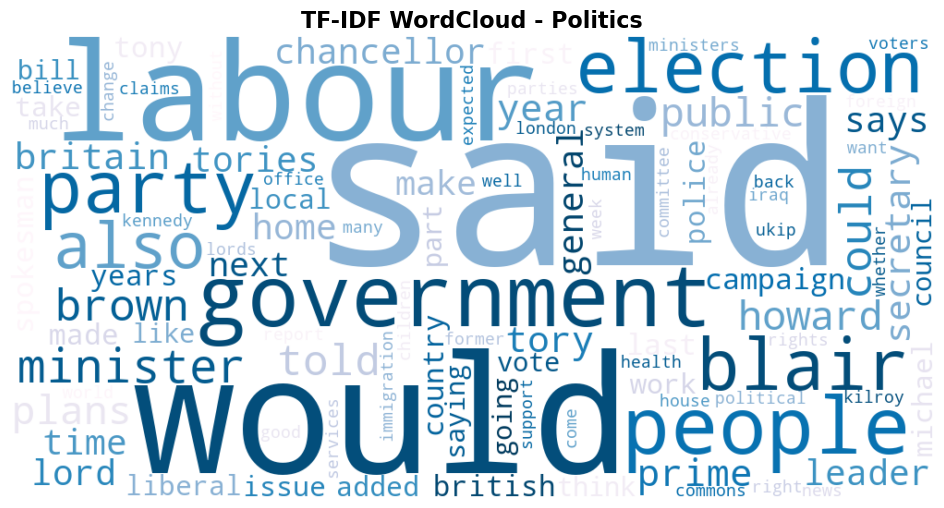

In [ ]:
show_wordcloud_for_category("politics")

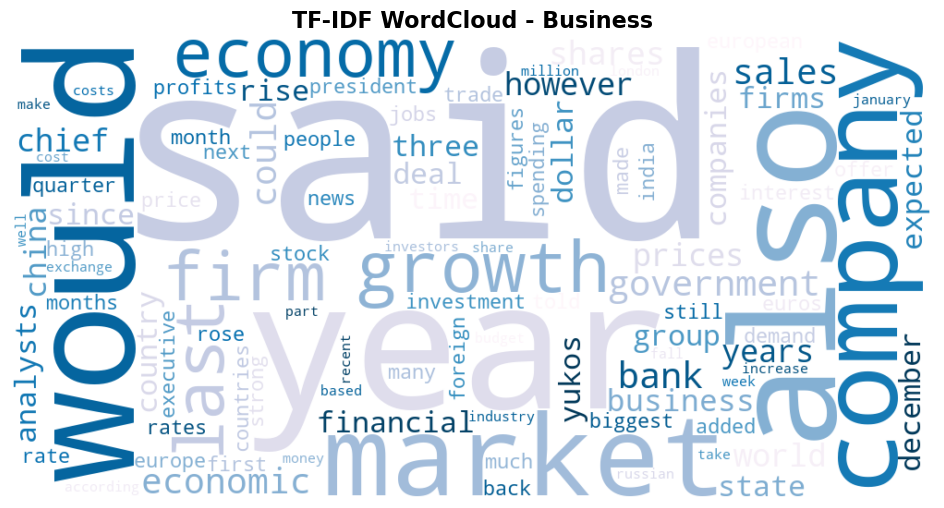

In [ ]:
show_wordcloud_for_category("business")

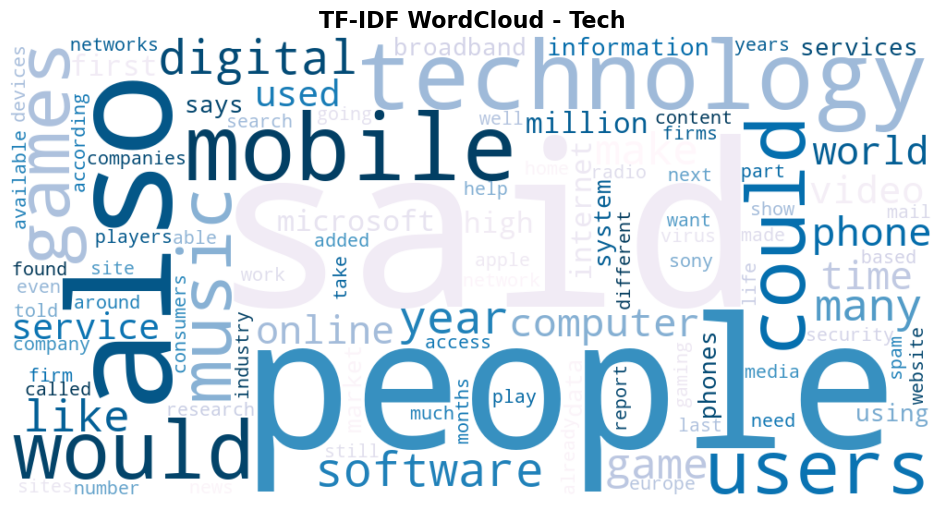

In [ ]:
show_wordcloud_for_category("tech")

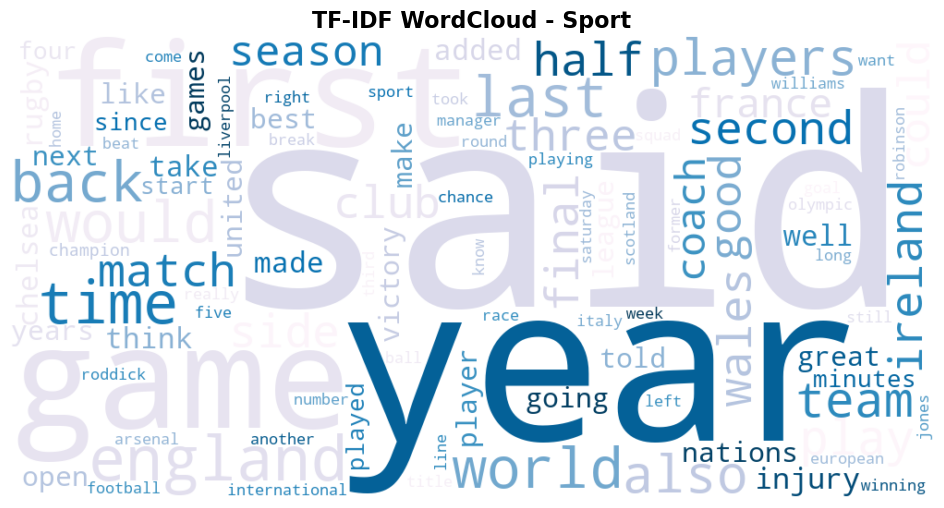

In [ ]:
show_wordcloud_for_category("sport")

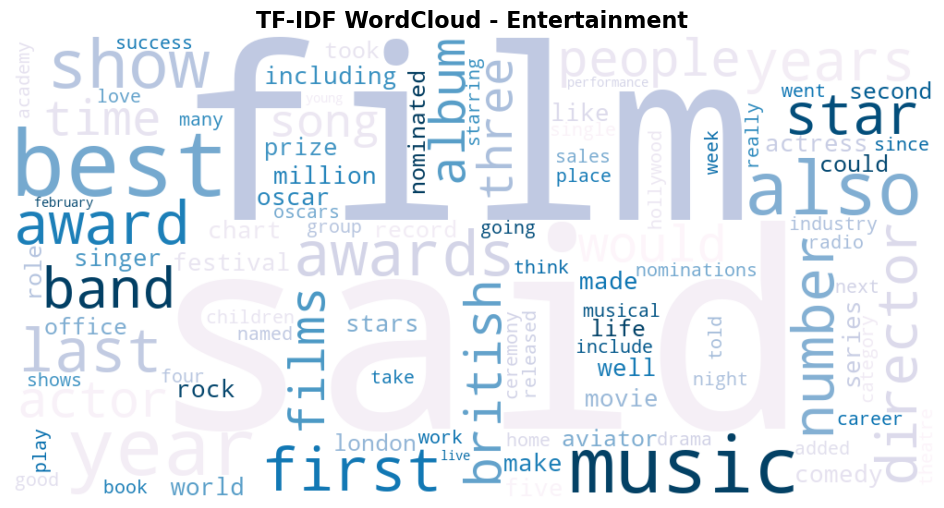

In [ ]:
show_wordcloud_for_category("entertainment")

## EDA Ïù∏ÏÇ¨Ïù¥Ìä∏
---
```
1. Îâ¥Ïä§ Í∏∞ÏÇ¨ Î∞è ÏöîÏïΩ Í∏∏Ïù¥ Î∂ÑÌè¨
- Îâ¥Ïä§ Î≥∏Î¨∏ ÌèâÍ∑† Î¨∏Ïû• Ïàò: 18.62  
- ÏöîÏïΩ ÌèâÍ∑† Î¨∏Ïû• Ïàò: 2.08  
- Îâ¥Ïä§ Î≥∏Î¨∏ ÌèâÍ∑† Îã®Ïñ¥ Ïàò: 438.30  
- ÏöîÏïΩ ÌèâÍ∑† Îã®Ïñ¥ Ïàò: 184.01  
```

```
2. Î≥∏Î¨∏-ÏöîÏïΩ Í∏∏Ïù¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
- Î¨∏Ïû• Ïàò Í∏∞Ï§Ä ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.98 (Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
```
  ‚û°Ô∏è Î≥∏Î¨∏ Í∏∏Ïù¥Ïóê ÎπÑÎ°ÄÌï¥ ÏöîÏïΩ Í∏∏Ïù¥ Ï°∞Ï†à (Adaptive Summary Length) Ï†ÑÎûµ ÌôúÏö© Í∞ÄÎä•


```
3. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∏∞ÏÇ¨ Ïàò Î∂ÑÌè¨
- Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞Ñ Í∏∞ÏÇ¨ Ïàò Ìé∏Ï∞®Îäî ÌÅ¨ÏßÄ ÏïäÏùå (ÏµúÏÜå 386 ~ ÏµúÎåÄ 511)  
```
  ‚û°Ô∏è ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ïù¥ÏäàÎäî Í±∞Ïùò ÏóÜÏùå


```
4. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏöîÏïΩ Í∏∏Ïù¥ Ìé∏Ï∞®
- tech / politics: ÏöîÏïΩÏù¥ Í∞ÄÏû• Í∏∏Í≥† Ï†ïÎ≥¥Îüâ ÎßéÏùå  
- sport / entertainment: ÏßßÍ≥† Í∞ÑÍ≤∞Ìïú ÏöîÏïΩ ÏÑ†Ìò∏  
```
  ‚û°Ô∏è Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏöîÏïΩ Í∏∏Ïù¥ Ï†ÑÎûµ Ï∞®Îì± Ï†ÅÏö© Í≥†Î†§ (ex. tech: top-5, sport: top-2)



# Ï†ÑÏ≤òÎ¶¨
---


1. **Î¨∏Ïûê Ï†ïÏ†ú (clean_text)**  
   - ÌÖçÏä§Ìä∏Î•º ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÌôòÌïòÏó¨ ÎåÄÏÜåÎ¨∏Ïûê Ï∞®Ïù¥Ïóê Îî∞Î•∏ Î∂àÏùºÏπòÎ•º Ï†úÍ±∞  
   - Ï†ïÍ∑úÌëúÌòÑÏãùÏùÑ ÏÇ¨Ïö©Ìï¥ ÏïåÌååÎ≤≥, Ïà´Ïûê, Í≥µÎ∞±Îßå ÎÇ®Í∏∞Í≥† ÌäπÏàòÎ¨∏ÏûêÏôÄ Î∂àÌïÑÏöîÌïú Í≥µÎ∞±ÏùÑ Ï†úÍ±∞

2. **Î∂àÏö©Ïñ¥ Ï†úÍ±∞ (remove_stopwords)**  
   - `nltk.word_tokenize`Î•º Ïù¥Ïö©Ìï¥ ÌÖçÏä§Ìä∏Î•º Îã®Ïñ¥ Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨  
   - NLTK Î∂àÏö©Ïñ¥ Î™©Î°ùÏóê Ìè¨Ìï®Îêú Îã®Ïñ¥Îì§ÏùÑ Ï†úÍ±∞ÌïòÏó¨ ÌïµÏã¨ Îã®Ïñ¥ Ï§ëÏã¨Ïùò ÌÖçÏä§Ìä∏Î°ú Î≥ÄÌôò

3. **Ï†ÑÏ≤¥ ÌååÏù¥ÌîÑÎùºÏù∏ (preprocess_text)**  
   - ÏúÑ Îëê Í≥ºÏ†ïÏùÑ ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ï†ÅÏö©ÌïòÏó¨ Ï†ïÏ†úÎêú ÌÖçÏä§Ìä∏Î•º ÏÉùÏÑ±

4. **Î¨∏Ïû• ÌÜ†ÌÅ∞Ìôî (tokenize_sentences)**  
   - ÏõêÎ¨∏ÏùÑ `sent_tokenize` Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Î¨∏Ïû• Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨  
   - Ïù¥Î†áÍ≤å ÏÉùÏÑ±Îêú Î¨∏Ïû• Î¶¨Ïä§Ìä∏Îäî Ï∂îÏ∂úÏ†Å ÏöîÏïΩ Î™®Îç∏ÏóêÏÑú ÌõÑÎ≥¥ Î¨∏Ïû•ÏùÑ ÏÑ†ÌÉùÌï† Îïå, ÎòêÎäî Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÏÑùÏóê ÌôúÏö©

5. **Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º Ï∂îÍ∞Ä**  
   - ÏõêÎ≥∏ ÌÖçÏä§Ìä∏(`article_text`, `summary_text`)Ïóê ÎåÄÌï¥ Ï†ÑÏ≤òÎ¶¨Ìïú Í≤∞Í≥ºÎ•º Í∞ÅÍ∞Å `article_clean`, `summary_clean` Ïª¨ÎüºÏóê Ï†ÄÏû•  
   - ÏõêÎ≥∏ Î¨∏Ïû• Î¶¨Ïä§Ìä∏ÎèÑ `article_sents` Ïª¨ÎüºÏóê Ï†ÄÏû•ÌïòÏó¨ ÏõêÎ¨∏Ïùò Íµ¨Ï°∞Ï†Å Ï†ïÎ≥¥Î•º Î≥¥Ï°¥



In [ ]:
import re

# Î∂àÏö©Ïñ¥ Î™©Î°ù
stop_words = set(stopwords.words("english"))

# Î¨∏Ïû• ÌÜ†ÌÅ∞Ìôî
def tokenize_sentences(text):
    return sent_tokenize(text)

# ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ + ÏÜåÎ¨∏ÏûêÌôî
def clean_text(text):
    text = text.lower() # ÏÜåÎ¨∏ÏûêÌôî
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# Î∂àÏö©Ïñ¥ Ï†úÍ±∞
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

# Ï†ÑÏ≤¥ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏
def preprocess_text(text):
    cleaned = clean_text(text)
    no_stop = remove_stopwords(cleaned)
    return no_stop

# Î≥∏Î¨∏ Î∞è ÏöîÏïΩ Ï†ÑÏ≤òÎ¶¨ Ïª¨Îüº Ï∂îÍ∞Ä
df["article_clean"] = df["article_text"].apply(preprocess_text)
df["summary_clean"] = df["summary_text"].apply(preprocess_text)

# Î¨∏Ïû• ÌÜ†ÌÅ∞Ìôî (ÏöîÏïΩ Í∏∏Ïù¥ ÏÑ§Ï†ï Îì±Ïóê ÏÇ¨Ïö©)
df["article_sents"] = df["article_text"].apply(tokenize_sentences)

# Í∞Å Î¨∏Ïû•ÏùÑ Ï†ÑÏ≤òÎ¶¨Ìïú Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df["article_sents_cleaned"] = df["article_sents"].apply(
    lambda sents: [preprocess_text(s) for s in sents]
)

In [ ]:
df.drop(columns=["article_path", "summary_path"], inplace=True)

**Top-N Í∏∞Ï§Ä**
```
ÌèâÍ∑† + ÌëúÏ§ÄÌé∏Ï∞®/2 < 2.5 ‚Üí Top-2

ÌèâÍ∑† + ÌëúÏ§ÄÌé∏Ï∞®/2 ‚â• 2.5 and < 3.5 ‚Üí Top-3

ÌèâÍ∑† + ÌëúÏ§ÄÌé∏Ï∞®/2 ‚â• 3.5 ‚Üí Top-4
```

In [ ]:
def decide_topn(row):
    upper_bound = row["avg_summary_sent"] + row["std_dev"]/2
    if upper_bound < 2.5:
        return 2
    elif upper_bound < 3.5:
        return 3
    else:
        return 4

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Top-N ÏÑ§Ï†ï
category_summary_stats["top_n"] = category_summary_stats.apply(decide_topn, axis=1)

# ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Î≥ÄÌôò
category_to_topn = dict(zip(category_summary_stats["category"], category_summary_stats["top_n"]))
category_to_topn

{'business': 2, 'entertainment': 2, 'politics': 3, 'sport': 4, 'tech': 3}

In [ ]:
df.head()

filename category                                       article_text  \
0  078.txt    sport  Butler strikes gold in Spain\n\nBritain's Kath...   
1  148.txt    sport  Palace threat over Cantona masks\n\nManchester...   
2  370.txt    sport  Robinson wants dual code success\n\nEngland ru...   
3  381.txt    sport  England claim Dubai Sevens glory\n\nEngland be...   
4  475.txt    sport  Agassi fear for Melbourne\n\nAndre Agassi's in...   

                                        summary_text  article_sent_count  \
0  Gelete Burka then crowned a great day for Ethi...                   8   
1  Manchester United fans wearing Eric Cantona ma...                   7   
2  Robinson, a former rugby league international ...                  17   
3  England beat Fiji 26-21 in a dramatic final in...                  10   
4  "I was not counting on this being the end of t...                  12   

   summary_sent_count  article_word_count  summary_word_count  \
0                   1                 191                  92   
1                   3                 177                  58   
2                   4                 373                 144   
3                   1                 261                  80   
4                   3                 274                  90   

                                       article_clean  \
0  butler strikes gold spain britains kathy butle...   
1  palace threat cantona masks manchester united ...   
2  robinson wants dual code success england rugby...   
3  england claim dubai sevens glory england beat ...   
4  agassi fear melbourne andre agassis involvemen...   

                                       summary_clean  \
0  gelete burka crowned great day ethiopia claimi...   
1  manchester united fans wearing eric cantona ma...   
2  robinson former rugby league international swi...   
3  england beat fiji 2621 dramatic final dubai wi...   
4  counting end day meandre agassis involvement a...   

                                       article_sents  \
0  [Butler strikes gold in Spain\n\nBritain's Kat...   
1  [Palace threat over Cantona masks\n\nMancheste...   
2  [Robinson wants dual code success\n\nEngland r...   
3  [England claim Dubai Sevens glory\n\nEngland b...   
4  [Agassi fear for Melbourne\n\nAndre Agassi's i...   

                               article_sents_cleaned  
0  [butler strikes gold spain britains kathy butl...  
1  [palace threat cantona masks manchester united...  
2  [robinson wants dual code success england rugb...  
3  [england claim dubai sevens glory england beat...  
4  [agassi fear melbourne andre agassis involveme...

In [ ]:
df['article_sents'][0]

["Butler strikes gold in Spain\n\nBritain's Kathy Butler continued her impressive year with victory in Sunday's 25th Cross Internacional de Venta de Banos in Spain.",
 'The Scot, who led GB to World Cross Country bronze earlier this year, moved away from the field with Ines Monteiro halfway into the 6.6km race.',
 'She then shrugged off her Portuguese rival to win in 20 minutes 38 seconds.',
 "Meanwhile, Briton Karl Keska battled bravely to finish seventh in the men's 10.6km race in a time of 31:41.",
 'Kenenisa Bekele of Ethiopia - the reigning world long and short course champion - was never troubled by any of the opposition, winning leisurely in 30.26.',
 'Butler said of her success: "I felt great throughout the race and hope this is a good beginning for a marvellous 2005 season for me."',
 'Elsewhere, Abebe Dinkessa of Ethiopia won the Brussels IAAF cross-country race on Sunday, completing the 10,500m course in 33.22.',
 "Gelete Burka then crowned a great day for Ethiopia by claimi

In [ ]:
df['article_sents_cleaned'][0]

['butler strikes gold spain britains kathy butler continued impressive year victory sundays 25th cross internacional de venta de banos spain',
 'scot led gb world cross country bronze earlier year moved away field ines monteiro halfway 66km race',
 'shrugged portuguese rival win 20 minutes 38 seconds',
 'meanwhile briton karl keska battled bravely finish seventh mens 106km race time 3141',
 'kenenisa bekele ethiopia reigning world long short course champion never troubled opposition winning leisurely 3026',
 'butler said success felt great throughout race hope good beginning marvellous 2005 season',
 'elsewhere abebe dinkessa ethiopia brussels iaaf crosscountry race sunday completing 10500m course 3322',
 'gelete burka crowned great day ethiopia claiming victory womens race']

# Î™®Îç∏ÎßÅ

 ## TF-IDF Í∏∞Î∞ò Î¨∏Ïû• Ï§ëÏöîÎèÑ
 ---
 Í∞Å Î¨∏Ïû•Î≥Ñ TF-IDF Ï¥ùÌï© ‚Üí Top-N Î¨∏Ïû• ÏÑ†ÌÉù

 Îã®ÏàúÌûà Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏöîÏïΩÎ≥∏Ïùò ÌèâÍ∑† Î¨∏Ïû•ÏàòÎ•º Î∞òÏò¨Î¶ºÌïòÎ©¥ Ìé∏Ï∞®Î•º Î∞òÏòÅÌïòÏßÄ Î™ªÌïòÎØÄÎ°ú, Ïù¥Î•º Î∞òÏòÅÌïòÏó¨ Top-N ÏÑ§Ï†ï

 **Ï†ïÏ†úÎêú Î¨∏Ïû•(article_sents_cleaned)ÏúºÎ°ú Ï†êÏàò Í≥ÑÏÇ∞, ÏõêÎ≥∏ Î¨∏Ïû•ÏúºÎ°ú Ï∂úÎ†•**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def summarize_with_cleaned_input(sentences, cleaned_sentences, top_n):
    if len(sentences) == 0:
        return ""
    elif len(sentences) <= top_n:
        return " ".join(sentences)

    # TF-IDF Í≥ÑÏÇ∞ (Ï†ïÏ†úÎêú Î¨∏Ïû• ÏÇ¨Ïö©)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(cleaned_sentences)

    # Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
    sentence_scores = tfidf_matrix.sum(axis=1).flatten().tolist()[0]
    top_indices = np.argsort(sentence_scores)[-top_n:][::-1]
    top_indices_sorted = sorted(top_indices)

    # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ ÏõêÎ¨∏ Î¨∏Ïû•
    return " ".join([sentences[i] for i in top_indices_sorted])

In [ ]:
df["tfidf_summary"] = df.apply(
    lambda row: summarize_with_cleaned_input(
        row["article_sents"],
        row["article_sents_cleaned"],
        category_to_topn[row["category"]]
    ),
    axis=1
)

In [ ]:
tf_idf_summary = df[[
    "filename", "category", "article_text", "summary_text", "tfidf_summary"
]].copy()

In [ ]:
tf_idf_summary.head()

filename category                                       article_text  \
0  078.txt    sport  Butler strikes gold in Spain\n\nBritain's Kath...   
1  148.txt    sport  Palace threat over Cantona masks\n\nManchester...   
2  370.txt    sport  Robinson wants dual code success\n\nEngland ru...   
3  381.txt    sport  England claim Dubai Sevens glory\n\nEngland be...   
4  475.txt    sport  Agassi fear for Melbourne\n\nAndre Agassi's in...   

                                        summary_text  \
0  Gelete Burka then crowned a great day for Ethi...   
1  Manchester United fans wearing Eric Cantona ma...   
2  Robinson, a former rugby league international ...   
3  England beat Fiji 26-21 in a dramatic final in...   
4  "I was not counting on this being the end of t...   

                                       tfidf_summary  
0  Butler strikes gold in Spain\n\nBritain's Kath...  
1  United fans are planning to mark the 10th anni...  
2  Robinson, a former rugby league international ...  
3  England claim Dubai Sevens glory\n\nEngland be...  
4  Agassi fear for Melbourne\n\nAndre Agassi's in...

## TextRank (Graph Í∏∞Î∞ò)
---
**TextRank ÏöîÏïΩ Íµ¨Ï°∞ ÏöîÏïΩ** : Ï†ïÏ†úÎêú Î¨∏Ïû• ‚Üí Î≤°ÌÑ∞Ìôî(fast text) ‚Üí Ïú†ÏÇ¨ÎèÑ(ÏΩîÏÇ¨Ïù∏) ‚Üí Í∑∏ÎûòÌîÑ ‚Üí PageRank ‚Üí Top-N Ïù∏Îç±Ïä§ ‚Üí ÏõêÎ¨∏ Ï∂úÎ†•

| Îã®Í≥Ñ | ÏÑ§Î™Ö |
|------|------|
| 1Ô∏è‚É£ Î¨∏Ïû• Î¶¨Ïä§Ìä∏ | `article_sents` ‚Üí ÏõêÎ¨∏ Î¨∏Ïû• Î¶¨Ïä§Ìä∏ |
| 2Ô∏è‚É£ Î¨∏Ïû• Ï†ïÏ†ú | `article_sents_cleaned` ‚Üí Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞Ïö© |
| 3Ô∏è‚É£ Î¨∏Ïû• Í∞Ñ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ | Cosine Similarity Í∏∞Î∞ò |
| 4Ô∏è‚É£ Í∑∏ÎûòÌîÑ Íµ¨ÏÑ± | ÎÖ∏Îìú = Î¨∏Ïû•, Ïó£ÏßÄ = Ïú†ÏÇ¨ÎèÑ |
| 5Ô∏è‚É£ PageRank Ï†ÅÏö© | Ï§ëÏöî Î¨∏Ïû• Ï∂îÏ∂ú |
| 6Ô∏è‚É£ ÏõêÎ¨∏ Í∏∞Ï§Ä Top-N Î¨∏Ïû• Ï∂úÎ†• | ‚Üí ÏöîÏïΩ ÏÉùÏÑ± |

---


In [ ]:
!pip install fasttext

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73.4/73.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-macosx_15_0_arm64.whl size=283746 sha256=c786c4019d688cfc49589272054e2522ff5ce9e7a8a624ee4a73853bd8516fb0
  Stored in directory: /Users/sonyunboi/Library/Caches/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
# FastText Î™®Îç∏ Îã§Ïö¥Î°úÎìú Î∞è Î°úÎìú
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')
import networkx as nx
from tqdm import tqdm
tqdm.pandas()
# ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Î¨∏Ïû• Î≤°ÌÑ∞Ìôî Ìï®Ïàò
def get_sentence_vector(sentence, model):
    words = word_tokenize(sentence)
    word_vecs = [model[word] for word in words if word in model]
    if len(word_vecs) == 0:
        return np.zeros(model.get_dimension())
    return np.mean(word_vecs, axis=0)

# text rank Í∏∞Î∞ò ÏöîÏïΩ Ìï®Ïàò
def summarize_textrank(sentences, cleaned_sentences, top_n):
    if len(sentences) == 0:
        return ""
    elif len(sentences) <= top_n:
        return " ".join(sentences)

    # Î¨∏Ïû• Î≤°ÌÑ∞ ÏÉùÏÑ±
    sentence_vectors = [get_sentence_vector(sent, ft) for sent in cleaned_sentences]

    # Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ Í≥ÑÏÇ∞
    sim_matrix = cosine_similarity(sentence_vectors)

    # Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Î∞è PageRank ÏàòÌñâ
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)

    # Ï§ëÏöîÎèÑ ÏÉÅÏúÑ Î¨∏Ïû• Ï∂îÏ∂ú
    ranked = sorted(((scores[i], i) for i in range(len(scores))), reverse=True)
    top_indices = sorted([i for (_, i) in ranked[:top_n]])

    # ÏõêÎ¨∏ Í∏∞Ï§Ä Ï†ïÎ†¨ ÌõÑ Ïó∞Í≤∞
    return " ".join([sentences[i] for i in top_indices])

In [ ]:
# ÏöîÏïΩÎ¨∏ ÏÉùÏÑ±
df["textrank_summary"] = df.progress_apply(
    lambda row: summarize_textrank(
        row["article_sents"],
        row["article_sents_cleaned"],
        category_to_topn[row["category"]]
    ),
    axis=1
)

text_rank_summary = df[[
    "filename", "category", "article_text", "summary_text", "textrank_summary"
]].copy()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2225/2225 [05:17<00:00,  7.02it/s]


In [ ]:
text_rank_summary.head()

filename category                                       article_text  \
0  078.txt    sport  Butler strikes gold in Spain\n\nBritain's Kath...   
1  148.txt    sport  Palace threat over Cantona masks\n\nManchester...   
2  370.txt    sport  Robinson wants dual code success\n\nEngland ru...   
3  381.txt    sport  England claim Dubai Sevens glory\n\nEngland be...   
4  475.txt    sport  Agassi fear for Melbourne\n\nAndre Agassi's in...   

                                        summary_text  \
0  Gelete Burka then crowned a great day for Ethi...   
1  Manchester United fans wearing Eric Cantona ma...   
2  Robinson, a former rugby league international ...   
3  England beat Fiji 26-21 in a dramatic final in...   
4  "I was not counting on this being the end of t...   

                                    textrank_summary  
0  Meanwhile, Briton Karl Keska battled bravely t...  
1  Palace threat over Cantona masks\n\nManchester...  
2  "Beating the Aussies in both games would be a ...  
3  England claim Dubai Sevens glory\n\nEngland be...  
4  Agassi fear for Melbourne\n\nAndre Agassi's in...

## ÌïòÏù¥Î∏åÎ¶¨Îìú Î™®Îç∏
---
* TF-IDF Í∞ÄÏ§ëÏπòÎ•º TextRank Ï¥àÍ∏∞Í∞íÏóê Î∞òÏòÅÌïú Î™®Îç∏
* Ï§ëÏöî Î¨∏Ïû•ÏùÑ Îçî Ï†ïÍµêÌïòÍ≤å Î∞òÏòÅ Í∞ÄÎä•

```
[ÏûÖÎ†• ÌÖçÏä§Ìä∏ (Îâ¥Ïä§ Í∏∞ÏÇ¨)]
        ‚Üì
[Î¨∏Ïû• Îã®ÏúÑÎ°ú Î∂ÑÌï† + Ï†ÑÏ≤òÎ¶¨]
        ‚Üì
[1. FastText: Î¨∏Ïû• ÏûÑÎ≤†Îî©]
        ‚Üì
[2. Cosine Similarity ‚Üí Î¨∏Ïû• Í∞Ñ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨]
        ‚Üì
[3. TF-IDF: Í∞Å Î¨∏Ïû•Ïóê ÎåÄÌïú Îã®Ïñ¥ Ï§ëÏöîÎèÑ Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞]
        ‚Üì
[4. Í∑∏ÎûòÌîÑ ÏÉùÏÑ± (Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ Í∏∞Î∞ò)]
        ‚Üì
[5. PageRank ÏàòÌñâ: TF-IDF Ïä§ÏΩîÏñ¥Î•º Ï¥àÍ∏∞ Í∞ÄÏ§ëÏπò(personalization)Î°ú ÏÇ¨Ïö©]
        ‚Üì
[6. ÏµúÏ¢Ö Î¨∏Ïû• Ï§ëÏöîÎèÑ ÏÉÅÏúÑ Top-N Î¨∏Ïû• ÏÑ†ÌÉù ‚Üí ÏöîÏïΩ]
```

In [ ]:
def summarize_hybrid_textrank(sentences, cleaned_sentences, top_n):
    if len(sentences) == 0:
        return ""
    elif len(sentences) <= top_n:
        return " ".join(sentences)

    # ‚ñ∂ Î¨∏Ïû• Î≤°ÌÑ∞ (FastText Í∏∞Î∞ò)
    sentence_vectors = [get_sentence_vector(sent, ft) for sent in cleaned_sentences]

    # ‚ñ∂ Î¨∏Ïû• Í∞Ñ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ (ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ)
    sim_matrix_hybrid = cosine_similarity(sentence_vectors)  # Î≥ÄÏàòÎ™Ö Î≥ÄÍ≤Ω

    # ‚ñ∂ TF-IDF Í∏∞Î∞ò Î¨∏Ïû• Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞ (Ï†ïÏ†úÎêú Î¨∏Ïû• ÏÇ¨Ïö©)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(cleaned_sentences)

    # tfidf_scoresÎ•º ÏôÑÏ†ÑÌûà flatten ÌïòÏó¨ Ïà´Ïûê Î¶¨Ïä§Ìä∏Î°ú ÎßåÎì¶
    tfidf_scores = np.array(tfidf_matrix.sum(axis=1)).flatten().tolist()

    # ‚ñ∂ Ï†ïÍ∑úÌôî (sum = 1Î°ú ÎßûÏ∂∞ÏÑú PageRankÏóê ÎÑ£Í∏∞ ÏúÑÌï®)
    total = sum(tfidf_scores)
    if total == 0:
        tfidf_scores = [1 / len(sentences)] * len(sentences)
    else:
        tfidf_scores = [s / total for s in tfidf_scores]

    # ‚ñ∂ TextRank Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    nx_graph = nx.from_numpy_array(sim_matrix_hybrid)  # ÏàòÏ†ïÎêú Î≥ÄÏàò ÏÇ¨Ïö©

    # ‚ñ∂ PageRank + TF-IDF Í∏∞Î∞ò Ï¥àÍ∏∞ Í∞ÄÏ§ëÏπò (personalization)
    personalization = {i: tfidf_scores[i] for i in range(len(sentences))}
    scores = nx.pagerank(nx_graph, personalization=personalization)

    # ‚ñ∂ ÏÉÅÏúÑ Ï§ëÏöî Î¨∏Ïû• Top-N ÏÑ†ÌÉù
    ranked = sorted(((scores[i], i) for i in range(len(scores))), reverse=True)
    top_indices = sorted([i for (_, i) in ranked[:top_n]])

    return " ".join([sentences[i] for i in top_indices])

In [ ]:
df["hybrid_summary"] = df.progress_apply(
    lambda row: summarize_hybrid_textrank(
        row["article_sents"],
        row["article_sents_cleaned"],
        category_to_topn[row["category"]]
    ),
    axis=1
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2225/2225 [04:55<00:00,  7.53it/s]


In [ ]:
hybrid_summary = df[[
    "filename", "category", "article_text", "summary_text", "hybrid_summary"
]].copy()

hybrid_summary.head()

filename category                                       article_text  \
0  078.txt    sport  Butler strikes gold in Spain\n\nBritain's Kath...   
1  148.txt    sport  Palace threat over Cantona masks\n\nManchester...   
2  370.txt    sport  Robinson wants dual code success\n\nEngland ru...   
3  381.txt    sport  England claim Dubai Sevens glory\n\nEngland be...   
4  475.txt    sport  Agassi fear for Melbourne\n\nAndre Agassi's in...   

                                        summary_text  \
0  Gelete Burka then crowned a great day for Ethi...   
1  Manchester United fans wearing Eric Cantona ma...   
2  Robinson, a former rugby league international ...   
3  England beat Fiji 26-21 in a dramatic final in...   
4  "I was not counting on this being the end of t...   

                                      hybrid_summary  
0  The Scot, who led GB to World Cross Country br...  
1  Palace threat over Cantona masks\n\nManchester...  
2  "Beating the Aussies in both games would be a ...  
3  England claim Dubai Sevens glory\n\nEngland be...  
4  Agassi fear for Melbourne\n\nAndre Agassi's in...

In [ ]:
hybrid_summary['hybrid_summary'][0]

"The Scot, who led GB to World Cross Country bronze earlier this year, moved away from the field with Ines Monteiro halfway into the 6.6km race. Meanwhile, Briton Karl Keska battled bravely to finish seventh in the men's 10.6km race in a time of 31:41. Kenenisa Bekele of Ethiopia - the reigning world long and short course champion - was never troubled by any of the opposition, winning leisurely in 30.26. Gelete Burka then crowned a great day for Ethiopia by claiming victory in the women's race."

In [ ]:
text_rank_summary['textrank_summary'][0]

"Meanwhile, Briton Karl Keska battled bravely to finish seventh in the men's 10.6km race in a time of 31:41. Kenenisa Bekele of Ethiopia - the reigning world long and short course champion - was never troubled by any of the opposition, winning leisurely in 30.26. Elsewhere, Abebe Dinkessa of Ethiopia won the Brussels IAAF cross-country race on Sunday, completing the 10,500m course in 33.22. Gelete Burka then crowned a great day for Ethiopia by claiming victory in the women's race."

## ÏöîÏïΩÎ¨∏(Ï†ïÎãµ)Í≥º ÌèâÍ∑† Îã®Ïñ¥Ïàò ÎπÑÍµê

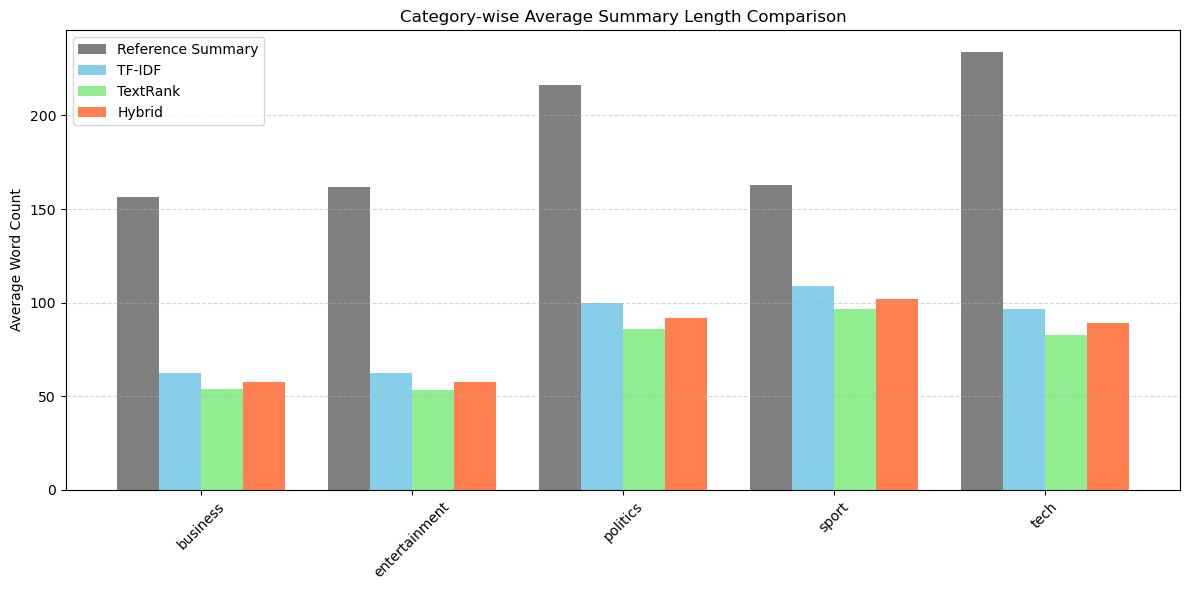

In [ ]:
# ÏöîÏïΩÎ¨∏ Îã®Ïñ¥ Ïàò Í≥ÑÏÇ∞

df["tfidf_len"] = df["tfidf_summary"].apply(lambda x: len(x.split()))
df["textrank_len"] = df["textrank_summary"].apply(lambda x: len(x.split()))
df["hybrid_len"] = df["hybrid_summary"].apply(lambda x: len(x.split()))

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† Îã®Ïñ¥ Ïàò Í≥ÑÏÇ∞
length_stats = df.groupby("category")[["summary_word_count", "tfidf_len", "textrank_len", "hybrid_len"]].mean().round(1).reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
bar_width = 0.2
x = range(len(length_stats))

plt.bar([i - 1.5*bar_width for i in x], length_stats["summary_word_count"], width=bar_width, label="Reference Summary", color='grey')
plt.bar([i - 0.5*bar_width for i in x], length_stats["tfidf_len"], width=bar_width, label="TF-IDF", color='skyblue')
plt.bar([i + 0.5*bar_width for i in x], length_stats["textrank_len"], width=bar_width, label="TextRank", color='lightgreen')
plt.bar([i + 1.5*bar_width for i in x], length_stats["hybrid_len"], width=bar_width, label="Hybrid", color='coral')

plt.xticks(x, length_stats["category"], rotation=45)
plt.ylabel("Average Word Count")
plt.title("Category-wise Average Summary Length Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÎÇòÏùò ÏöîÏïΩÎ≥∏Ïù¥ Îã®Ïñ¥ÏàòÍ∞Ä Ï†ÅÎã§, ÏöîÏïΩÎ≥∏ ÎÅºÎ¶¨ Ï∞®Ïù¥Îäî ÏóÜÎäî Ìé∏**

# ÌèâÍ∞Ä

## Evaluation Metrics Overview
---
1. ROUGE Metrics

```
ROUGE-1: ÌõÑÎ≥¥ ÏöîÏïΩÍ≥º Í∏∞Ï§Ä ÏöîÏïΩ Í∞ÑÏùò unigram(1-gram) Í≤πÏπ® ÎπÑÏú®ÏùÑ Ï∏°Ï†ïÌï©ÎãàÎã§.

ÌäπÏßï: Îã®Ïñ¥ ÏàòÏ§ÄÏóêÏÑú ÌïµÏã¨ ÎÇ¥Ïö©Ïù¥ ÏñºÎßàÎÇò Ìè¨Ìï®ÎêòÏóàÎäîÏßÄ ÌèâÍ∞ÄÌï©ÎãàÎã§.
```
```
ROUGE-2: ÌõÑÎ≥¥ ÏöîÏïΩÍ≥º Í∏∞Ï§Ä ÏöîÏïΩ Í∞ÑÏùò bigram(2-gram) Í≤πÏπ® ÎπÑÏú®ÏùÑ Ï∏°Ï†ïÌï©ÎãàÎã§.

ÌäπÏßï: Îã®Ïñ¥Ïùò ÏàúÏÑúÏôÄ Ïù∏Ï†ëÏÑ±Ïù¥ Î∞òÏòÅÎêòÏñ¥ ÏöîÏïΩÏùò Ïú†Ï∞ΩÏÑ± Î∞è Íµ¨Ï°∞Ï†Å Ïó∞Í≤∞ÏÑ±ÏùÑ ÌèâÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.
```
```
ROUGE-L: Îëê ÌÖçÏä§Ìä∏ Í∞ÑÏùò Í∞ÄÏû• Í∏¥ Í≥µÌÜµ Î∂ÄÎ∂Ñ ÏàòÏó¥(Longest Common Subsequence)ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌèâÍ∞ÄÌï©ÎãàÎã§.

ÌäπÏßï: Î¨∏Ïû• Íµ¨Ï°∞ÏôÄ ÌùêÎ¶ÑÏùÑ Î∞òÏòÅÌïòÎäî ÎèôÏãúÏóê, Îã®Ïñ¥ ÏàúÏÑúÏóê ÏïΩÍ∞ÑÏùò ÏúµÌÜµÏÑ±ÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§.
```
```
2. BERTScore

BERTScoreÎäî ÏÇ¨Ï†ÑÌïôÏäµÎêú BERT(ÎòêÎäî Ïú†ÏÇ¨ Î™®Îç∏)Ïùò Î¨∏Îß•Ï†Å ÏûÑÎ≤†Îî©ÏùÑ ÌôúÏö©Ìï¥, ÌõÑÎ≥¥ ÏöîÏïΩÍ≥º Í∏∞Ï§Ä ÏöîÏïΩÏùò Îã®Ïñ¥ Í∞Ñ ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

ÌäπÏßï: ÌëúÎ©¥Ï†ÅÏù∏ Îã®Ïñ¥ Í≤πÏπ®Ïù¥ ÏïÑÎãàÎùº ÏùòÎØ∏Î°†Ï†Å ÏùºÏπòÎ•º Ï∏°Ï†ïÌïòÎØÄÎ°ú, ÌëúÌòÑÏù¥ Îã§Î•¥ÎçîÎùºÎèÑ ÎπÑÏä∑Ìïú ÏùòÎØ∏Î•º Ï†ÑÎã¨ÌïòÎäî Í≤ΩÏö∞ ÎÜíÏùÄ Ï†êÏàòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.
```
```
3. METEOR

METEORÎäî Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®ÏùÑ Î™®Îëê Í≥†Î†§ÌïòÎ©∞, stemming(Ïñ¥Í∞Ñ Ï∂îÏ∂ú)Í≥º ÎèôÏùòÏñ¥ Îß§Ïπ≠ÏùÑ Ï†ÅÏö©Ìï¥ ÌõÑÎ≥¥ÏôÄ Í∏∞Ï§Ä ÏöîÏïΩÏùò Îã®Ïñ¥ ÏùºÏπòÎ•º ÌèâÍ∞ÄÌï©ÎãàÎã§.

ÌäπÏßï: Îã®ÏàúÌïú n-gram ÏùºÏπò Ïô∏ÏóêÎèÑ Ïñ¥Í∑ºÍ≥º ÎèôÏùòÏñ¥Î•º Í≥†Î†§ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Î≥¥Îã§ Ïù∏Í∞ÑÏùò ÌèâÍ∞ÄÏôÄ Ïú†ÏÇ¨Ìïú Í≤∞Í≥ºÎ•º Ï†úÍ≥µÌï©ÎãàÎã§.
```
```
Í≤∞Í≥º Ìï¥ÏÑù:

ÎÜíÏùÄ ROUGE Ï†êÏàò: ÌõÑÎ≥¥ ÏöîÏïΩÏù¥ Í∏∞Ï§Ä ÏöîÏïΩÏùò Îã®Ïñ¥ Î∞è Íµ¨Î¨∏ Íµ¨Ï°∞Î•º Ïûò Î∞òÏòÅÌïòÍ≥† ÏûàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

ÎÜíÏùÄ BERTScore: ÌõÑÎ≥¥ ÏöîÏïΩÏù¥ ÏùòÎØ∏Ï†ÅÏúºÎ°ú Í∏∞Ï§Ä ÏöîÏïΩÍ≥º Ïú†ÏÇ¨Ìï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

ÎÜíÏùÄ METEOR Ï†êÏàò: ÌõÑÎ≥¥ ÏöîÏïΩÏù¥ Í∏∞Ï§Ä ÏöîÏïΩÍ≥º Ïñ¥Í∑º, ÎèôÏùòÏñ¥ Îì±ÏóêÏÑú Ïûò Ï†ïÎ†¨ÎêòÏñ¥ ÏûàÎã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§.
```

In [ ]:
!pip install rouge-score bert-score

## ROUGH, METEOR Score

In [ ]:
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score
from bert_score import score as bert_score_fn

# ÌèâÍ∞ÄÏóê ÏÇ¨Ïö©Ìï† Î™®Îç∏ ÌõÑÎ≥¥ ÏöîÏïΩ Ïª¨Îüº Ïù¥Î¶Ñ (dfÏóê ÏÉùÏÑ±Ìïú ÏöîÏïΩ Í≤∞Í≥º ÏπºÎüº)
models = ['tfidf_summary', 'textrank_summary', 'hybrid_summary']

# ROUGE scorer Ï¥àÍ∏∞Ìôî (stemmer ÏÇ¨Ïö©)
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def compute_rouge(candidate, reference):
    """
    ÌõÑÎ≥¥ÏôÄ Í∏∞Ï§Ä ÏöîÏïΩ ÌÖçÏä§Ìä∏ ÏÇ¨Ïù¥Ïùò ROUGE Ï†êÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    scores = scorer.score(reference, candidate)
    return scores

nltk.download('wordnet')

# Í∞Å Î™®Îç∏Î≥ÑÎ°ú ÌèâÍ∞Ä Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
results = {model: {'rouge1': [], 'rouge2': [], 'rougeL': [], 'meteor': []} for model in models}

# Í∞Å Î™®Îç∏Ïóê ÎåÄÌï¥ dfÏùò Í∞Å Í∏∞ÏÇ¨Î≥Ñ ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ (referenceÎäî df['summary_text'])
for model in models:
    for idx, row in df.iterrows():
        candidate = row[model]
        reference = row['summary_text']

        # ROUGE Ï†êÏàò Í≥ÑÏÇ∞ (f-measure ÏÇ¨Ïö©)
        rouge_scores = compute_rouge(candidate, reference)
        results[model]['rouge1'].append(rouge_scores['rouge1'].fmeasure)
        results[model]['rouge2'].append(rouge_scores['rouge2'].fmeasure)
        results[model]['rougeL'].append(rouge_scores['rougeL'].fmeasure)

        # METEOR Ï†êÏàò Í≥ÑÏÇ∞: ÌõÑÎ≥¥ÏôÄ Í∏∞Ï§ÄÏùÑ ÌÜ†ÌÅ∞ÌôîÌïú Î¶¨Ïä§Ìä∏Î°ú Ï†ÑÎã¨
        candidate_tokens = word_tokenize(candidate)
        reference_tokens = word_tokenize(reference)
        meteor = meteor_score([reference_tokens], candidate_tokens)
        results[model]['meteor'].append(meteor)

    # Í∞Å Î™®Îç∏Î≥Ñ ÌèâÍ∑† Ï†êÏàò Ï∂úÎ†•
    print(f"Model: {model}")
    print("Average ROUGE-1 F1:", np.mean(results[model]['rouge1']))
    print("Average ROUGE-2 F1:", np.mean(results[model]['rouge2']))
    print("Average ROUGE-L F1:", np.mean(results[model]['rougeL']))
    print("Average METEOR:", np.mean(results[model]['meteor']))
    print("-" * 30)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sonyunboi/nltk_data...


Model: tfidf_summary
Average ROUGE-1 F1: 0.47825572716453474
Average ROUGE-2 F1: 0.36749851442254294
Average ROUGE-L F1: 0.3614498495302697
Average METEOR: 0.3475020979450618
------------------------------
Model: textrank_summary
Average ROUGE-1 F1: 0.5200254177042983
Average ROUGE-2 F1: 0.44679001235076027
Average ROUGE-L F1: 0.39799331704377494
Average METEOR: 0.3645313992940825
------------------------------
Model: hybrid_summary
Average ROUGE-1 F1: 0.5306568071106641
Average ROUGE-2 F1: 0.4524159607531553
Average ROUGE-L F1: 0.4064505864083713
Average METEOR: 0.37915758882883077
------------------------------


## BERT Score

In [ ]:
# BERTScore ÌèâÍ∞Ä
for model in models:
    candidate_list = df[model].tolist()
    reference_list = df['summary_text'].tolist()

    # BERTScoreÏùò P, R, F1 Ï†êÏàòÎ•º Í≥ÑÏÇ∞ (ÏòÅÏñ¥ Í∏∞Ï§Ä)
    P, R, F1 = bert_score_fn(candidate_list, reference_list, lang="en", verbose=True)
    print(f"Model: {model}")
    print("Average BERTScore F1:", F1.mean().item())
    print("-" * 30)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/66 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/35 [00:00<?, ?it/s]

done in 5566.30 seconds, 0.40 sentences/sec
Model: tfidf_summary
Average BERTScore F1: 0.88718581199646
------------------------------


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/66 [00:00<?, ?it/s]

# Ï†ïÏÑ±Ï†Å ÌèâÍ∞Ä
---
Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥ÑÎ°ú ÎûúÎç§ÌïòÍ≤å ÌïòÎÇòÏî© ÎΩëÏïÑ ÏßÅÏ†ë ÎπÑÍµê

In [ ]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ Î¶¨Ïä§Ìä∏
categories = ['sport', 'business', 'tech', 'politics', 'entertainment']

# ÏÉòÌîå Í∏∞ÏÇ¨ Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
sampled_articles = []

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌïòÎÇòÏî© ÏÉòÌîåÎßÅ
for cat in categories:
    sampled = df[df['category'] == cat].sample(n=1, random_state=42)  # reproducible
    sampled_articles.append(sampled)

# Í≤∞Í≥º ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
sample_df = pd.concat(sampled_articles).reset_index(drop=True)
sample_df = sample_df[['category', 'summary_text', 'tfidf_summary', 'textrank_summary', 'hybrid_summary']]


In [ ]:
sample_df

category                                       summary_text  \
0          sport  Some people have been saying it would be bette...   
1       business  The firm said sales were down 4% in 2004 to 78...   
2           tech  The Cellery worm installs a playable version o...   
3       politics  Mr Blair said that whether the public chose Mi...   
4  entertainment  But they still want more.They have to want to ...   

                                       tfidf_summary  \
0  Often in friendlies, though, a manager will pl...   
1  Income from its vehicle-carrying shuttle servi...   
2  While users play the game, the worm spends its...   
3  Mr Blair said that whether the public chose Mi...   
4  The group were born when Mullen put an appeal ...   

                                    textrank_summary  \
0  But international bosses will tell you that sc...   
1  Low-cost airlines hit Eurotunnel\n\nChannel Tu...   
2  Windows worm travels with Tetris\n\nUsers are ...   
3  Tory co-chairman Liam Fox was speaking after M...   
4  Songs like Sunday Bloody Sunday and New Year's...   

                                      hybrid_summary  
0  But international bosses will tell you that sc...  
1  Low-cost airlines hit Eurotunnel\n\nChannel Tu...  
2  Windows worm travels with Tetris\n\nUsers are ...  
3  Mr Blair said that whether the public chose Mi...  
4  Songs like Sunday Bloody Sunday and New Year's...

In [ ]:
for i in range(len(sample_df)):
    row = sample_df.iloc[i]

    md = f"""
### üì∞ Ïπ¥ÌÖåÍ≥†Î¶¨: **{row['category']}**

#### üü° Í∏∞Ï§Ä ÏöîÏïΩ (Reference)
{row['summary_text']}

---

#### üîµ TF-IDF ÏöîÏïΩ
{row['tfidf_summary']}

#### üîµ TextRank ÏöîÏïΩ
{row['textrank_summary']}

#### üîµ Hybrid ÏöîÏïΩ
{row['hybrid_summary']}

---
"""

    print(md)
    print("\n" + "#" * 80 + "\n")  # Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•


### üì∞ Ïπ¥ÌÖåÍ≥†Î¶¨: **sport**

#### üü° Í∏∞Ï§Ä ÏöîÏïΩ (Reference)
Some people have been saying it would be better to get the players together for the week, and do away with the 90 minutes at the end.I would say it's 50-50 whether you should have these games or not, and if you look at it that way you would probably say you're better not doing so.It would certainly keep club managers happy, as it would reduce the risk of players returning to domestic duty injured.The more you play together, the easier it is when it comes to the crunch in games like World Cup quarter-finals against Brazil.Often in friendlies, though, a manager will play his strongest side for the first 45 minutes and then send out an entirely different one in the second half.It is the sort of move you would expect from Walter, who is a canny manager.John Toshack has his first game in charge of Wales, and it will be important for him to get a decent result against Hungary.One manager who has got it right this week is 

## Ï†ïÏÑ± ÌèâÍ∞ÄÌï¥ÏÑù

---

## ‚úÖ Ï†ïÏÑ± ÌèâÍ∞Ä ÏöîÏïΩ

### üéØ ÌèâÍ∞Ä Í∏∞Ï§Ä Ï†ïÎ¶¨:

| ÌèâÍ∞Ä Ìï≠Î™© | ÏÑ§Î™Ö |
|-----------|------|
| ÌïµÏã¨ Ï†ïÎ≥¥ Ìè¨Ìï® Ïó¨Î∂Ä | Í∏∞Ï§Ä ÏöîÏïΩÏóêÏÑú Ïñ∏Í∏âÎêú Ï£ºÏ†ú/ÌïµÏã¨ Ïù∏Î¨ºÏù¥ ÏñºÎßàÎÇò Ïûò Î∞òÏòÅÎêòÏóàÎäîÍ∞Ä |
| ÎπÑÌïµÏã¨ Î¨∏Ïû• Ìè¨Ìï® | Î∂àÌïÑÏöîÌïòÍ±∞ÎÇò Ï£ºÏ†úÏôÄ ÏßÅÏ†ë Í¥ÄÎ†® ÏóÜÎäî Î¨∏Ïû•Ïù¥ ÏûàÎäîÍ∞Ä |
| ÏùòÎØ∏ Ï†ÑÎã¨ Ï†ïÌôïÎèÑ | Í∏∞Ï§Ä ÏöîÏïΩÍ≥º ÏùòÎØ∏Ï†ÅÏúºÎ°ú Ïú†ÏÇ¨Ìïú ÏöîÏïΩÏùÑ Ï†úÍ≥µÌïòÎäîÍ∞Ä |
| ÎÖºÎ¶¨ ÌùêÎ¶Ñ | ÏöîÏïΩ ÎÇ¥ Î¨∏Ïû• Í∞Ñ Ïó∞Í≤∞Ïù¥ ÏûêÏó∞Ïä§Îü¨Ïö¥Í∞Ä |

---

## 1. üì∞ **Sport**

- **Reference ÌïµÏã¨**: Íµ≠Í∞ÄÎåÄÌëú Í≤ΩÍ∏∞/ÌõàÎ†®Ïùò Ìö®Ïö©ÏÑ± ÎÖºÎûÄ, Í∞êÎèÖÎì§Ïùò Ï†ëÍ∑ºÎ≤ï ÎπÑÍµê, ÏõîÎìúÏªµ Ï§ÄÎπÑ Îß•ÎùΩ
- **TF-IDF**:
  - ‚úÖ Í¥ÄÎ†® Í∞êÎèÖ Ïñ∏Í∏â ÏûàÏùå
  - ‚ùå ‚ÄúÌõàÎ†® Ï∫†ÌîÑ‚Äù Ïù¥Ïô∏Ïóê *ÎπÑÏ£ºÎ•ò Ï†ïÎ≥¥* (Ïòà: Í∞úÎ≥Ñ ÏÑ†Ïàò Ïñ∏Í∏â, Î∂ÑÏúÑÍ∏∞) Í∞ïÏ°∞
- **TextRank & Hybrid**:
  - ‚úÖ "friendlies ÌèêÏßÄ ÎÖºÎûÄ", "ÌåÄÏõåÌÅ¨", "Ï°¥ ÌÜ†ÏÉ• Ï∑®ÏûÑ" Îì±Ïùò Îß•ÎùΩ Î∞òÏòÅ
  - ‚úÖ Í∏∞Ï§Ä ÏöîÏïΩÏùò *ÌïµÏã¨ ÌùêÎ¶ÑÍ≥º Ïú†ÏÇ¨*
  - üîÅ HybridÏôÄ TextRank ÎÇ¥Ïö© ÎèôÏùº ‚Üí TF-IDF Í∞ÄÏ§ëÏπòÍ∞Ä ÏùòÎØ∏ Î≥¥ÏôÑÏóêÎäî ÌÅ∞ ÏòÅÌñ• X

‚úÖ **Ï¥ùÌèâ**: Hybrid/TextRankÍ∞Ä ÌïµÏã¨ Ï£ºÏ†ú(Í≤ΩÍ∏∞ Ïú†Î¨¥ ÎÖºÏüÅ + ÌåÄÏõåÌÅ¨ ÌõàÎ†®)Î•º Îçî Ïûò Ìè¨Ï∞©. TF-IDFÎäî Îã®Ïñ¥ Îã®ÏúÑ Ï†ïÎ≥¥Ïóê ÏπòÏö∞Ï≥ê Î≥¥ÏûÑ.

---

## 2. üì∞ **Business**

- **Reference ÌïµÏã¨**: Ïú†Î°úÌÑ∞ÎÑê Ïû¨Î¨¥ÏúÑÍ∏∞, Ï†ÅÏûê, ÏùÄÌñâ Í∞úÏûÖ Í∞ÄÎä•ÏÑ±, ÏãúÏû• ÏòÅÌñ•
- **TF-IDF**:
  - ‚ùå *ÏàòÏùµ Ìï≠Î™© ÏÑ∏Î∂Ä ÏàòÏπò* ÏúÑÏ£º ‚Üí ÌïµÏã¨ Î©îÏãúÏßÄ(ÏúÑÍ∏∞, Íµ¨Ï°∞Ï°∞Ï†ï)Îäî ÏïΩÌï®
- **TextRank & Hybrid**:
  - ‚úÖ ‚ÄúEurotunnel sales fall‚Äù, ‚Äúlow-cost airlines ÏúÑÌòë‚Äù Îì± ÌïµÏã¨ Î©îÏù∏ Ïù¥Ïäà Ìè¨Ï∞©
  - ‚úÖ ÏöîÏïΩ Ï†ÑÏ≤¥Í∞Ä ÏúÑÍ∏∞ ÏÑúÏÇ¨ Ï§ëÏã¨
  - ‚ùå Îã§Îßå Í∏∞Ï§Ä ÏöîÏïΩÏ≤òÎüº *Íµ¨Ï≤¥Ï†Å Ïà´Ïûê Ï†ïÎ≥¥ÎÇò Ïù∏Ïö©Î¨∏*ÏùÄ ÎàÑÎùΩ

‚úÖ **Ï¥ùÌèâ**: TextRank/HybridÍ∞Ä Îçî ÏöîÏïΩ ÏùòÎèÑÏóê Î∂ÄÌï©Ìï®. TF-IDFÎäî ÏùòÎØ∏ Ï§ëÏã¨ ÏöîÏïΩÏóê ÎπÑÌï¥ *Ïà´Ïûê/ÏÑ∏Î∂Ä ÏÇ¨Ìï≠* Ï§ëÏã¨ÏúºÎ°ú ÌùêÎ¶ÑÏù¥ Î∂ÑÏÇ∞Îê®.

---

## 3. üì∞ **Tech**

- **Reference ÌïµÏã¨**: Cellery Ïõú = Tetris ÏúÑÏû• ‚Üí ÎÑ§Ìä∏ÏõåÌÅ¨ Í∞êÏóº
- **TF-IDF**:
  - ‚úÖ Í∞êÏóº Î∞©Ïãù ÏÑ§Î™Ö Ìè¨Ìï®
  - ‚ùå Î≥¥Ïïà Ï†ÑÎ¨∏Í∞Ä ÏΩîÎ©òÌä∏ Îì± *ÎπÑÌïµÏã¨ Î¨∏Ïû• Ìè¨Ìï®*
- **TextRank**:
  - ‚úÖ ÏõúÏùò Í∞êÏóº Î∞©ÏãùÍ≥º Í∏∞Îä• ÏöîÏïΩ
  - ‚ùå Îã§ÏÜå Îã®Ìé∏Ï†ÅÏù¥Í≥†, Î∂ÄÍ∞Ä Îß•ÎùΩ Î∂ÄÏ°±
- **Hybrid**:
  - ‚úÖ Í∞êÏóº + Í≤åÏûÑ + ÏÇ¨Ïö©Ïûê ÌòºÎèô Í∞ÄÎä•ÏÑ±ÍπåÏßÄ Ïñ∏Í∏â ‚Üí Í∞ÄÏû• ÏôÑÍ≤∞ÎèÑ ÎÜíÏùå

‚úÖ **Ï¥ùÌèâ**: HybridÍ∞Ä Tetris ÏúÑÏû•, Í∞êÏóº Íµ¨Ï°∞, ÏÇ¨Ïö©Ïûê Î∞òÏùëÍπåÏßÄ Ìè¨Í¥ÑÏ†ÅÏúºÎ°ú Ïª§Î≤Ñ. TF-IDFÎäî ÏùòÎØ∏ Îß•ÎùΩÎ≥¥Îã§ Îã®Ïñ¥ Î∂ÑÌè¨ Îî∞ÎùºÍ∞Ñ Í≤ΩÌñ•.

---

## 4. üì∞ **Politics**

- **Reference ÌïµÏã¨**: Î∏îÎ†àÏñ¥Ïùò ÌÜ†Î¶¨ ÎπÑÌåê, Ìè≠Ïä§Ïùò Î∞òÏùë, ÏÑ†Í±∞ Ï†ÑÎûµ, ¬£50Îßå ÌôòÍ∏â
- **TF-IDF & Hybrid**:
  - ‚úÖ Î∏îÎ†àÏñ¥-Ìè≠Ïä§ ÎÖºÏüÅ, ÌôòÍ∏â Ïñ∏Í∏â Ìè¨Ìï® ‚Üí Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Í∏∞Ï§Ä ÏöîÏïΩÍ≥º Îß§Ïö∞ Ïú†ÏÇ¨
- **TextRank**:
  - ‚úÖ Ìè≠Ïä§ Ï§ëÏã¨ ÎπÑÌåêÏùÄ Ìè¨Ìï®, Í∑∏Îü¨ÎÇò Î∏îÎ†àÏñ¥ ÏßÅÏ†ë Ïù∏Ïö©Ïù¥ ÏÉùÎûµÎê®
  - üîÅ ÏùºÎ∂Ä Ï†ïÌô© ÏÑ§Î™ÖÏóê ÏπòÏ§ë

‚úÖ **Ï¥ùÌèâ**: HybridÍ∞Ä Î∏îÎ†àÏñ¥ Ïù∏Ïö©Í≥º Ìè≠Ïä§Ïùò ÎπÑÌåê Î™®Îëê Ìè¨Ìï®ÌïòÏó¨ Í∑†ÌòïÍ∞ê Ï¢ãÏùå. TextRankÎäî Ïù∏Î¨º Ï§ëÏã¨ Îß•ÎùΩÏùÄ ÏÇ¥Î¶¨Îêò ÏùºÎ∂Ä Ï†ïÎ≥¥Í∞Ä Îã®Ï†àÎê®.

---

## 5. üì∞ **Entertainment**

- **Reference ÌïµÏã¨**: U2Ïùò Î™©Ìëú, ÏßÄÏÜçÎêú Ïù∏Í∏∞ÏôÄ Î≥ÄÌôî Ï∂îÍµ¨, Ïï®Î≤î/Í≥µÏó∞ Î≥ÄÌôî
- **TF-IDF**:
  - ‚ùå Í≥ºÍ±∞ Í≤∞ÏÑ± Ïä§ÌÜ†Î¶¨ÏôÄ Í≥µÏó∞ Ïó∞Ï∂úÏóê ÏßëÏ§ë ‚Üí *ÌïµÏã¨ Ï£ºÏ†ú ÎàÑÎùΩ*
- **TextRank/Hybrid**:
  - ‚úÖ "Sunday Bloody Sunday", "ÎåÄÏ§ëÏÑ± Ïú†ÏßÄ", "Î¨¥ÎåÄ Ïó∞Ï∂úÏùò ÏßÑÌôî" Îì± Ìè¨Ìï®
  - ‚úÖ Ïï®Î≤î/ÏΩòÏÖâÌä∏ Î≥ÄÌôî ÌùêÎ¶Ñ Ïú†ÏßÄ ‚Üí Í∏∞Ï§Ä ÏöîÏïΩÍ≥º ÎÖºÎ¶¨Ï†ÅÏúºÎ°ú Ïù¥Ïñ¥Ïßê

‚úÖ **Ï¥ùÌèâ**: TextRank/HybridÎäî Î∞¥ÎìúÏùò **ÏßÄÏÜçÏ†ÅÏù∏ ÏßÑÌôîÏôÄ Î©îÏãúÏßÄ Ïú†ÏßÄ**Î•º ÌëúÌòÑ. TF-IDFÎäî ÏùòÎØ∏ ÌùêÎ¶ÑÏóêÏÑú Î≤óÏñ¥ÎÇò *Î∞∞Í≤Ω ÏÑ§Î™Ö*Ïóê Ï¥àÏ†ê.

---

## üßæ ÏöîÏïΩÌëú (Ï†ïÏÑ± ÌèâÍ∞Ä Ï¥ùÌèâ)

| Ïπ¥ÌÖåÍ≥†Î¶¨ | TF-IDF ÏöîÏïΩ ÌíàÏßà | TextRank ÏöîÏïΩ ÌíàÏßà | Hybrid ÏöîÏïΩ ÌíàÏßà | Ï¥ùÌèâ |
|----------|------------------|---------------------|-------------------|------|
| Sport | ‚ùå Ï†ïÎ≥¥ ÎàÑÎùΩ, Ï§ëÎ≥µ | ‚úÖ Îß•ÎùΩ Î∞òÏòÅ | ‚úÖ ÏùòÎØ∏ ÌùêÎ¶Ñ Ïú†ÏßÄ | TextRank/Hybrid Ïö∞Ïàò |
| Business | ‚ùå ÏàòÏπò Ï§ëÏã¨ | ‚úÖ Ïù¥Ïäà Ï§ëÏã¨ | ‚úÖ ÏùòÎØ∏ Ïú†ÏßÄ | Hybrid ÏïΩÍ∞Ñ Ïö∞ÏÑ∏ |
| Tech | ‚ö†Ô∏è Î∂ÄÍ∞Ä ÏÑ§Î™Ö ÎßéÏùå | ‚úÖ Íµ¨Ï°∞ Î∞òÏòÅ | ‚úÖ ÏôÑÍ≤∞ÎèÑ Ïö∞Ïàò | Hybrid ÏµúÍ≥† |
| Politics | ‚úÖ Î©îÏãúÏßÄ Î∞òÏòÅ | ‚ö†Ô∏è ÏùºÎ∂Ä ÎàÑÎùΩ | ‚úÖ Í∑†ÌòïÏ†Å ÏÑúÏà† | Hybrid > TextRank |
| Entertainment | ‚ùå ÏùòÎØ∏ ÌùêÎ¶Ñ Îã®Ï†à | ‚úÖ ÌùêÎ¶Ñ Ï°¥Ïû¨ | ‚úÖ ÏùòÎØ∏ Í∞ïÌôî | Hybrid/TextRank Ïö∞Ïàò |

---

ÌïÑÏöîÌïòÎ©¥ Ïù¥Í±∏ Î∞úÌëúÏö© ÏöîÏïΩ Ïä¨ÎùºÏù¥ÎìúÎÇò Î≥¥Í≥†ÏÑú Ìè¨Îß∑ÏúºÎ°ú Ï†ïÎ¶¨Ìï¥Ï§Ñ Ïàò ÏûàÏñ¥! Ïñ¥Îñ§ ÌòïÌÉúÎ°ú Ï†ïÎ¶¨Ìï¥Ï§ÑÍπå?

# Ìï¥ÏÑù Î∞è ÌïúÍ≥Ñ

## Ï†ïÎüâ ÌèâÍ∞Ä ÏöîÏïΩ

| **Model**         | **ROUGE-1 (F1)** | **ROUGE-2 (F1)** | **ROUGE-L (F1)** | **METEOR** | **BERTScore (F1)** |
|------------------|------------------|------------------|------------------|------------|--------------------|
| **TF-IDF**       | 0.478            | 0.367            | 0.361            | 0.348      | 0.887              |
| **TextRank**     | 0.520            | 0.447            | 0.398            | 0.365      | **0.902**          |
| **Hybrid**       | **0.531**        | **0.452**        | **0.406**        | **0.379**  | **0.902**          |

---
```
ÏßÄÌëúÎ≥Ñ Ìï¥ÏÑù Î∞è Î™®Îç∏Î≥Ñ ÏÑ±Îä• Î∂ÑÏÑù
```
- **ROUGE-1 (Îã®Ïñ¥ Ï§ëÎ≥µ ÎπÑÏú®)**  
  ‚Üí ÌïµÏã¨ Îã®Ïñ¥Í∞Ä ÏñºÎßàÎÇò Ìè¨Ìï®ÎêêÎäîÏßÄÎ•º ÌèâÍ∞ÄÌï®.  
  ‚Üí **Hybrid Î™®Îç∏**Ïù¥ Í∞ÄÏû• ÎÜíÏùå ‚Üí Ï§ëÏöî Îã®Ïñ¥Î•º Ìö®Í≥ºÏ†ÅÏúºÎ°ú Î∞òÏòÅÌï®.

- **ROUGE-2 (Ïù∏Ï†ë Îã®Ïñ¥ Ï°∞Ìï©, bigram)**  
  ‚Üí Î¨∏Ïû•Ïùò **Ïú†Ï∞ΩÏÑ±**Í≥º **Íµ¨Î¨∏ Íµ¨Ï°∞ Î∞òÏòÅÎ†•** Ï∏°Ï†ï.  
  ‚Üí **Hybrid > TextRank > TF-IDF** ÏàúÏúºÎ°ú ÏÑ±Îä• Ïö∞Ïàò.

- **ROUGE-L (Î¨∏Ïû• Íµ¨Ï°∞ Í∏∞Î∞ò)**  
  ‚Üí Î¨∏Ïû• ÎÇ¥ Îã®Ïñ¥ ÏàúÏÑúÎ•º Í≥†Î†§Ìïú Í≥µÌÜµ Î∂ÄÎ∂Ñ ÏàòÏó¥ Ï∏°Ï†ï.  
  ‚Üí **Hybrid Î™®Îç∏**Ïù¥ Î¨∏Ïû• Íµ¨Ï°∞Î•º Í∞ÄÏû• Ïûò Î∞òÏòÅ.

- **METEOR (ÏùòÎØ∏ Ïú†ÏÇ¨ + ÎèôÏùòÏñ¥ Îß§Ïπ≠)**  
  ‚Üí Ïù∏Í∞Ñ ÌèâÍ∞ÄÏôÄ Ïú†ÏÇ¨Ìïú ÏÑ±Í≤©.  
  ‚Üí **Hybrid Î™®Îç∏**Ïù¥ ÎèôÏùòÏñ¥ Î∞è Î¨∏Ïû• Î≥ÄÌòï ÎåÄÏùëÏóêÏÑúÎèÑ Ïö∞Ïàò.

- **BERTScore (Î¨∏Îß• Í∏∞Î∞ò ÏùòÎØ∏ Ïú†ÏÇ¨ÎèÑ)**  
  ‚Üí ÏÇ¨Ï†ÑÌïôÏäµÎêú Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ ÏùòÎØ∏ Ïú†ÏÇ¨ÎèÑÎ•º ÌèâÍ∞Ä.  
  ‚Üí **TextRankÏôÄ Hybrid Î™®Îç∏Ïù¥ ÎèôÏùºÌïú ÏµúÍ≥† Ï†êÏàò(0.902)**Î•º Í∏∞Î°ù.  
  ‚Üí Îëê Î™®Îç∏ Î™®Îëê ÏùòÎØ∏ ÏàòÏ§ÄÏóêÏÑú Í∏∞Ï§Ä ÏöîÏïΩÍ≥º Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Í≤∞Í≥º ÎèÑÏ∂ú.

---


## Ï†ïÏÑ± ÌèâÍ∞Ä

Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∏∞ÏÇ¨ 1Í∞úÎ•º Î¨¥ÏûëÏúÑÎ°ú Ï∂îÏ∂úÌïòÏó¨, Í∏∞Ï§Ä ÏöîÏïΩÍ≥º ÏÑ∏ Î™®Îç∏Ïùò ÏöîÏïΩ Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÏòÄÎã§.  
Í∑∏ Í≤∞Í≥º, Îã§ÏùåÍ≥º Í∞ôÏùÄ Î™®Îç∏Î≥Ñ Í≤ΩÌñ•Ïù¥ ÎèÑÏ∂úÎêòÏóàÎã§:

| Ïπ¥ÌÖåÍ≥†Î¶¨ | TF-IDF ÏöîÏïΩ ÌíàÏßà | TextRank ÏöîÏïΩ ÌíàÏßà | Hybrid ÏöîÏïΩ ÌíàÏßà | Ï¥ùÌèâ |
|----------|------------------|---------------------|-------------------|------|
| **Sport** | ‚ùå Ï†ïÎ≥¥ ÎàÑÎùΩ, Îß•ÎùΩ Î∂ÑÏÇ∞ | ‚úÖ Îß•ÎùΩ Î∞òÏòÅ | ‚úÖ ÏùòÎØ∏ ÌùêÎ¶Ñ Ïú†ÏßÄ | TextRank/Hybrid Ïö∞Ïàò |
| **Business** | ‚ùå ÏàòÏπò Ï§ëÏã¨, Î©îÏãúÏßÄ ÏïΩÌï® | ‚úÖ ÏúÑÍ∏∞ Ï§ëÏã¨ ÏÑúÏà† | ‚úÖ ÏùòÎØ∏ Ïú†ÏßÄ | Hybrid ÏïΩÍ∞Ñ Ïö∞ÏÑ∏ |
| **Tech** | ‚ö†Ô∏è Î∂ÄÍ∞Ä ÏÑ§Î™Ö ÌòºÏûÖ | ‚úÖ Í∞êÏóº Íµ¨Ï°∞ Î∞òÏòÅ | ‚úÖ ÏôÑÍ≤∞ÎèÑ Ïö∞Ïàò | Hybrid ÏµúÍ≥† |
| **Politics** | ‚úÖ Ï£ºÏ†ú Ìè¨Ï∞© Ï†ïÌôï | ‚ö†Ô∏è ÏùºÎ∂Ä Ïù∏Ïö© ÏÉùÎûµ | ‚úÖ Í∑†ÌòïÏ†Å Ï†ïÎ≥¥ Ï†úÍ≥µ | Hybrid > TextRank |
| **Entertainment** | ‚ùå Í≥ºÍ±∞ ÏÑ§Î™Ö Ï§ëÏã¨ | ‚úÖ ÌùêÎ¶Ñ Ïú†ÏßÄ | ‚úÖ ÏùòÎØ∏ Í∞ïÌôî | TextRank/Hybrid Ïö∞Ïàò |


##  Ï¢ÖÌï© Ìï¥ÏÑù
- **TF-IDF**: Îã®Ïñ¥ Í∏∞Î∞ò ÎπàÎèÑ Ï§ëÏã¨ÏúºÎ°ú Î¨∏Ïû•ÏùÑ ÏÑ†ÌÉùÌï¥ **ÌïµÏã¨ Îß•ÎùΩ ÎàÑÎùΩ** ÎòêÎäî **ÎπÑÌïµÏã¨ ÏÑ§Î™Ö ÌòºÏûÖ**Ïùò Î¨∏Ï†úÍ∞Ä Î∞òÎ≥µÎê®
- **TextRank**: Î¨∏Ïû• Í∞Ñ Ïó∞Í≤∞ÏùÑ Ïûò Î∞òÏòÅÌï¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†ÅÏù¥ÏßÄÎßå, ÏùòÎØ∏Ï†Å Îã§ÏñëÏÑ± ÎòêÎäî Ïù∏Ïö©Ïùò Ìè¨Ï∞©ÏùÄ Î∂ÄÏ°±Ìï† Ïàò ÏûàÏùå
- **Hybrid**: ÎåÄÎ∂ÄÎ∂ÑÏùò ÏÉÅÌô©ÏóêÏÑú **Ï†ïÎ≥¥ Ìè¨Í¥ÑÏÑ±Í≥º ÏùòÎØ∏ Ï†ÑÎã¨Î†•**Ïù¥ Í∞ÄÏû• Ïö∞ÏàòÌïòÏòÄÏúºÎ©∞, TextRankÏùò Íµ¨Ï°∞Ï†Å Ïû•Ï†êÍ≥º TF-IDFÏùò Îã®Ïñ¥ Ï§ëÏöîÎèÑÎ•º Ï†ÅÏ†àÌûà ÏúµÌï©Ìï®

## ÌïòÏù¥Î∏åÎ¶¨Îìú Î™®Îç∏ Ìï¥ÏÑù
---
**BERTScoreÏóêÏÑú TextRankÏôÄ ÎèôÏùºÌïú Ï†êÏàò**Î•º Í∏∞Î°ùÌïú Ïù¥Ïú† ÌÉêÍµ¨


**TF-IDF Ï∂îÍ∞ÄÍ∞Ä ÏùòÎØ∏ Í∏∞Î∞ò Ïú†ÏÇ¨ÎèÑÏóê ÎØ∏Ïπú ÏòÅÌñ•**
```
‚úÖ Í¥ÄÏ∞∞Îêú ÌòÑÏÉÅ
- Hybrid Î™®Îç∏ÏùÄ **TextRankÏóê TF-IDF Ï†êÏàòÎ•º Ï¥àÍ∏∞ Í∞ÄÏ§ëÏπò(personalization)Î°ú Ï∂îÍ∞Ä**Ìïú Î™®Îç∏
- Íµ¨Ï°∞Ï†Å ÏßÄÌëú(ROUGE-1, ROUGE-2, ROUGE-L, METEOR)ÏóêÏÑúÎäî ÌôïÏã§Ìïú ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÏûàÏóàÏùå
- Í∑∏Îü¨ÎÇò **BERTScore(F1)**Îäî TextRankÏôÄ **ÏôÑÏ†ÑÌûà ÎèôÏùº (0.902)** ‚Üí **ÏùòÎØ∏ Í∏∞Î∞ò ÌèâÍ∞ÄÏóêÏÑúÎäî Ìñ•ÏÉÅ ÏóÜÏùå**
```
```
‚úÖ Ìï¥ÏÑù: TF-IDF Í∞ÄÏ§ëÏπòÏùò ÏòÅÌñ•Î†•ÏùÄ "Íµ¨Ï°∞Ï†Å Ï§ëÏöîÎèÑ"ÏóêÎßå ÏûëÏö©
```

| Íµ¨Î∂Ñ | ÏòÅÌñ• Ïó¨Î∂Ä | Ìï¥ÏÑù |
|------|-----------|------|
| Íµ¨Ï°∞Ï†Å ÌèâÍ∞Ä (ROUGE Îì±) | O (Í∏çÏ†ïÏ†Å Ìö®Í≥º) | TF-IDFÎ°ú ÌïµÏã¨ Îã®Ïñ¥Î•º Ìè¨Ìï®Ìïú Î¨∏Ïû•Ïóê Îçî ÎÜíÏùÄ ÌôïÎ•† Î∂ÄÏó¨ ‚Üí Íµ¨Ï°∞ Í∞úÏÑ† |
| ÏùòÎØ∏ Í∏∞Î∞ò ÌèâÍ∞Ä (BERTScore) | ‚úï (Î≥ÄÌôî ÏóÜÏùå) | TF-IDFÎäî Ïñ¥Ìúò ÎπàÎèÑ Í∏∞Î∞òÏù¥ÎØÄÎ°ú **ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÏÑ± Î∞òÏòÅ Î∂àÍ∞ÄÎä•** |


```
‚Üí Ï¶â, TF-IDF Ï†êÏàòÎäî Î¨∏Ïû•Ïùò ‚ÄúÎã®Ïñ¥ Ï§ëÏöîÎèÑ‚ÄùÎ•º Î≥¥ÏôÑÌï¥Ï£ºÏóàÏßÄÎßå, Í∑∏ Î¨∏Ïû•Ïù¥ Ï†ÑÎã¨ÌïòÎäî ÏùòÎØ∏ ÏûêÏ≤¥ÏóêÎäî ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ Î™ªÌñàÏùå
‚Üí ÏùòÎØ∏ Í∏∞Î∞ò ÏöîÏïΩ ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ÏÑúÎäî context-aware ÏûÑÎ≤†Îî©(BERT Îì±)Í∏∞Î∞ò Ï†ëÍ∑ºÏù¥ Ï∂îÍ∞ÄÎ°ú ÌïÑÏöî
```
---

### Hybrid Î™®Îç∏Ïùò ÏùòÎØ∏ ÌèâÍ∞Ä ÌïúÍ≥Ñ
```
ÎπÑÎ°ù Hybrid Î™®Îç∏ÏùÄ ROUGE Î∞è METEORÏôÄ Í∞ôÏùÄ Íµ¨Ï°∞Ï†Å ÏßÄÌëúÏóêÏÑú Í∞ÄÏû• Ïö∞ÏàòÌïú ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏßÄÎßå, BERTScoreÏóêÏÑúÎäî TextRankÏôÄ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º Í∏∞Î°ùÌïòÏòÄÎã§.  
Ïù¥Îäî TF-IDF Í∞ÄÏ§ëÏπòÍ∞Ä **Íµ¨Ï°∞Ï†Å ÏöîÏïΩ ÌíàÏßàÏùÄ Í∞úÏÑ†ÌñàÏßÄÎßå**, **Î¨∏Îß•Ï†Å ÏùòÎØ∏ Ïú†ÏÇ¨ÎèÑÏóêÎäî Í∏∞Ïó¨ÌïòÏßÄ Î™ªÌñàÏùåÏùÑ ÏãúÏÇ¨**ÌïúÎã§.

Îî∞ÎùºÏÑú, ÏùòÎØ∏ Í∏∞Î∞ò ÏöîÏïΩ ÌíàÏßà Ìñ•ÏÉÅÏùÑ ÏúÑÌï¥ÏÑúÎäî Îã®ÏàúÌïú Îã®Ïñ¥ Ï§ëÏöîÎèÑ Í∏∞Î∞ò Î≥¥ÏôÑÏùÑ ÎÑòÏñ¥ÏÑú, **Î¨∏Ïû• Îã®ÏúÑÏùò ÏùòÎØ∏ ÌëúÌòÑÏùÑ Ìè¨Ï∞©ÌïòÎäî ÏûÑÎ≤†Îî© Í∏∞Î∞ò Íµ¨Ï°∞(Sentence-BERT Îì±)**Ïùò Í≤∞Ìï©Ïù¥ ÌïÑÏöîÌïòÎã§.
```

---

## Îâ¥Ïä§ Í∏∞ÏÇ¨Ïùò ÌäπÏÑ±Í≥º ÏÇ¨Ïö© Î™®Îç∏Ïùò ÌïúÍ≥Ñ
```
ÏÉùÍ∞Å
- Îâ¥Ïä§ Í∏∞ÏÇ¨Îäî ÌïòÎÇòÏùò Ï£ºÏ†ú ÏïÑÎûò Ïì∞Ïù¥ÏßÄÎßå, Î¨∏Ïû• Í∞Ñ Ïó∞Í≤∞Ïñ¥Í∞Ä Ï†ÅÍ≥† Í∞Å Î¨∏Ïû•Ïù¥ ÎèÖÎ¶ΩÏ†Å(ÏßÅÏ†ëÏ†ÅÏù∏ Îã®Ïñ¥ Ï§ëÎ≥µ ÏóÜÏùå)ÏúºÎ°ú Íµ¨ÏÑ±Îê®.
- Îî∞ÎùºÏÑú TF-IDF Î∞è FastText Í∏∞Î∞ò Î¨∏Ïû• Ïú†ÏÇ¨ÎèÑ Î∞©ÏãùÏùÄ Îã®Ïñ¥ Ï§ëÎ≥µÏù¥ Ï†ÅÏùÄ Îâ¥Ïä§ Í∏∞ÏÇ¨ÏóêÏÑúÎäî Î¨∏Ïû• Í∞Ñ Ïó∞Í≤∞ÏÑ±ÏùÑ Ï†úÎåÄÎ°ú Ìè¨Ï∞©ÌïòÏßÄ Î™ªÌï† Ïàò ÏûàÏùå
- Í∑∏ Í≤∞Í≥º, Ï§ëÏöî Î¨∏Ïû•Ïù¥ ÎàÑÎùΩ**ÎêòÍ±∞ÎÇò, Î∞òÎåÄÎ°ú **ÎπÑÌïµÏã¨ Î¨∏Ïû•Ïù¥ ÏÑ†ÌÉù**Îê† Í∞ÄÎä•ÏÑ± ÎÜíÏùå.
```

‚úÖ **Ïã§Ï†ú Í≤∞Í≥ºÏôÄ Ï†ïÌôïÌûà ÏùºÏπòÌï®**  

- TF-IDF Í∏∞Î∞ò Î™®Îç∏Ïù¥ Î™®Îì† ÏßÄÌëúÏóêÏÑú Í∞ÄÏû• ÎÇÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏúºÎ©∞,  
- ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ÏóêÏÑúÎèÑ ÎåÄÎ∂ÄÎ∂ÑÏùò Î¨∏Ïû•Ïù¥ ÏÑúÎ°ú Ïú†ÏÇ¨ÎèÑÍ∞Ä Í±∞Ïùò 0Ïóê Í∞ÄÍπåÏö¥ Í∞íÏùÑ Í∞ÄÏßê ‚Üí Î¨∏Ïû• Í∞Ñ Ïú†ÏÇ¨ÎèÑÎ•º Í∏∞Î∞òÏúºÎ°ú Ìïú Ïó∞Í≤∞ÏÑ± Î∂ÄÏ°±ÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï®.
- ÏïÑÎûò ÎßàÏßÄÎßâ Í∏∞ÏÇ¨ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ÏùÑ Î≥¥Î©¥, Î¨∏Ïû• Í∞Ñ Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎåÄÎ∂ÄÎ∂Ñ 0Ïóê Í∞ÄÍπùÍ≥†, ÏùòÎØ∏ ÏûàÎäî Ïú†ÏÇ¨ÎèÑÎ•º Î≥¥Ïù¥Îäî ÏåçÏùÄ 0.45 (Î¨∏Ïû• 0Í≥º 2) Îã® Ìïú ÏåçÎøêÏûÑ.

In [ ]:
# ÌôïÏù∏Ìï¥Î≥¥Í∏∞ : ÎßàÏßÄÎßâ Í∏∞ÏÇ¨Î•º Î∂àÎü¨ÏôÄ Î≤°ÌÑ∞Ìôî + ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ Íµ¨Ìï®
# ÎßàÏßÄÎßâ Í∏∞ÏÇ¨ Î¨∏Ïû• Í∞ÄÏ†∏Ïò§Í∏∞
sentences = df.iloc[-1]["article_sents_cleaned"]

# TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

# ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ ÏÉùÏÑ±
sim_matrix = cosine_similarity(tfidf_matrix)
pd.DataFrame(sim_matrix).style.background_gradient(cmap='Blues') # ÎßàÏßÄÎßâ Í∏∞ÏÇ¨Ïóê ÎåÄÌïú ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§

---

## Î™®Îç∏ Íµ¨Ï°∞Ï†Å ÌïúÍ≥Ñ Î∞è Î≥¥ÏôÑ Ï†ÑÎûµ
| **Î™®Îç∏**      | **Íµ¨Ï°∞Ï†Å ÌïúÍ≥Ñ**                                                                 | **Î≥¥ÏôÑ Ï†ÑÎûµ Ï†úÏïà**                                                                 |
|---------------|----------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| **TF-IDF**    | Îã®Ïñ¥ ÎπàÎèÑ Í∏∞Î∞ò ‚Üí ÏùòÎØ∏ ÌååÏïÖ Î∂àÍ∞Ä, Î¨∏Ïû• Í∞Ñ Ïú†ÏÇ¨ÎèÑ ÎÇÆÏùå ‚Üí Ï§ëÏöîÌïú Î¨∏Ïû• ÎàÑÎùΩ Í∞ÄÎä•ÏÑ± | ÏùòÎØ∏ ÏûÑÎ≤†Îî© ÎèÑÏûÖ (Sentence-BERT Îì±), Îã®Ïñ¥ Ï§ëÏöîÎèÑ Ïô∏ Íµ¨Ï°∞ Ï†ïÎ≥¥ Í≤∞Ìï© ÌïÑÏöî         |
| **TextRank**  | Î¨∏Ïû• Í∞Ñ Ïú†ÏÇ¨ÎèÑ Í∏∞Î∞ò ‚Üí Îâ¥Ïä§Ï≤òÎüº Ïó∞Í≤∞ÏÑ±Ïù¥ ÏïΩÌïú Î¨∏ÏÑúÏóêÏÑúÎäî Í∑∏ÎûòÌîÑ Ïó∞Í≤∞ ÏïΩÌôî         | Ïú†ÏÇ¨ÎèÑ Í∏∞Î∞ò Í∞ÑÏÑ† Ïô∏Ïóê TF-IDF Ï†êÏàò Îì± Ïô∏Î∂Ä Ï†ïÎ≥¥Î°ú ÎÖ∏Îìú Í∞ïÌôî (Hybrid Î∞©Ïãù)         |
| **Hybrid**    | TF-IDF Í∏∞Î∞ò Ï§ëÏöîÎèÑ Î∞òÏòÅ ‚Üí Ï†ÑÎ∞òÏ†Å ÏÑ±Îä• Ìñ•ÏÉÅ, Í∑∏Îü¨ÎÇò Ïú†ÏÇ¨ÎèÑ ÏûêÏ≤¥ ÌïúÍ≥Ñ Ï°¥Ïû¨        | Î¨∏Ïû• ÏùòÎØ∏ ÏûÑÎ≤†Îî© Í∏∞Î∞ò Graph + TF-IDF Í∞ÄÏ§ëÏπò Ï°∞Ìï© Îì± ÏùòÎØ∏Ï†Å Íµ¨Ï°∞ÍπåÏßÄ Î∞òÏòÅ ÌïÑÏöî    |